# 👌 1.1. [Modèles linéaires](https://scikit-learn.org/stable/modules/linear_model.html)

Voici un ensemble de méthodes destinées à la régression dans lesquelles la valeur cible est censée être une combinaison linéaire des caractéristiques. En notation mathématique, si $\hat{y}$ est la valeur prédite :

$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p =x^\top w +  w_0$

Dans tout le module, nous désignons le vecteur $w = (w_1,..., w_p)$ par `coef_` et $w_0$ comme `intercept_`.

Pour effectuer une classification avec des modèles linéaires généralisés, voir [Régression logistique](#logistic-regression).

# 👌 1.1.1. [*Moindres Carrés* Ordinaires](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

La classe [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) ajuste un modèle linéaire avec des coefficients $w = (w_1,..., w_p)$ pour minimiser la somme résiduelle des carrés entre les cibles observées dans l'ensemble de données et les cibles prédites par l'approximation linéaire. Mathématiquement, il résout un problème de la forme :

$\min_{w} || X w - y||_2^2$

[`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) prend les tableaux $X$ et $y$ dans sa méthode `fit` d'ajustement et stocke les coefficients du modèle linéaire dans son membre `coef_` :

In [6]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2]) # > LinearRegression()
print('coef_      :', reg.coef_) # > array([0.5, 0.5])
print('intercept_ :', reg.intercept_)

coef_      : [0.5 0.5]
intercept_ : 2.220446049250313e-16


👌 Les estimations de coefficient pour les Moindres Carrés Ordinaires reposent sur l'indépendance des caractéristiques. Lorsque les caractéristiques sont corrélées et que les colonnes de la matrice de conception ont une dépendance approximativement linéaire, la matrice de conception devient proche du singulier et, par conséquent, l'estimation des moindres carrés devient très sensible aux erreurs aléatoires dans la cible observée, produisant une grande variance. Cette situation de multicolinéarité peut survenir, par exemple, lorsque des données sont collectées sans plan expérimental.

👌 [**Exemple** de régression liénaire](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

L'exemple ci-dessous utilise uniquement la première caractéristique de l'ensemble de données `diabetes` sur le diabète, afin d'illustrer les points de données dans le tracé bidimensionnel. La ligne droite peut être vue dans le graphique, montrant comment la régression linéaire tente de tracer une ligne droite qui minimisera au mieux la somme résiduelle des carrés entre les réponses observées dans l'ensemble de données et les réponses prédites par l'approximation linéaire.

Les coefficients, la somme résiduelle des carrés et le coefficient de détermination sont également calculés.

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


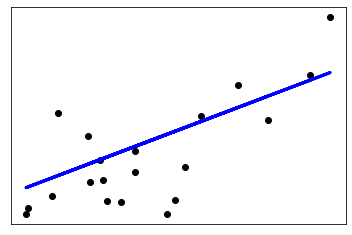

In [7]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## 👌 1.1.1.1. Moindres Carrés Non-Négatif

Il est possible de contraindre tous les coefficients à être non négatifs, ce qui peut être utile lorsqu'ils représentent certaines quantités physiques ou naturellement non négatives (par exemple, les comptages de fréquence ou les prix des biens). [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) accepte un paramètre booléen `positive` : lorsqu'il est défini `True` les Moindres Carrés Non-Négatif sont alors appliqués.

👌  [**Exemple** de moindres carrés non-négtif](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

Dans cet exemple, nous ajustons un modèle linéaire avec des contraintes positives sur les coefficients de régression et comparons les coefficients estimés à une régression linéaire classique.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Génération de données aléatoires

In [9]:
np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# Add some noise
y += 5 * np.random.normal(size=(n_samples,))

Divise les données en jeu d'entraînement et jeu de test.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Ajuste le Non-Negative least squares.

In [11]:
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.8225220806196525


Ajuste un OLS.

In [12]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.7436926291700343


En comparant les coefficients de régression entre OLS et NNLS, nous pouvons observer qu'ils sont fortement corrélés (la ligne pointillée est la relation d'identité), mais la contrainte non négative en réduit certains à 0. Les moindres carrés non négatifs donnent intrinsèquement des résultats clairsemés.

Text(0, 0.5, 'NNLS regression coefficients')

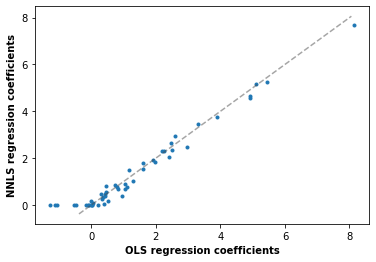

In [13]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

## 👌 1.1.1.2. Complexité des Moindres Carrés Ordinaire

La solution des moindres carrés est calculée à l'aide de la décomposition en valeurs singulières de X. Si X est une matrice de forme `(n_samples, n_features)`, cette méthode a un coût de $O(n_{\text{samples}} n_{\text{features}}^2)$, en admettant que $n_{\text{samples}} \geq n_{\text{features}}$.

# 👌 1.1.2. [Régression et classification d'arête](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

## 👌 1.1.2.1. Régression

La régression de crête [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) résout certains des problèmes des moindres carrés ordinaires en imposant une pénalité à la taille des coefficients. Les coefficients d'arête minimisent une somme résiduelle des carrés pénalisée :

$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$

Le paramètre de complexité $\alpha \geq 0$ contrôle le niveau de rétrécissement : plus la valeur de $\alpha$ est importante, plus le niveau de rétrécissement est important, et donc les coefficients deviennent plus robustes à la colinéarité.

Comme avec les autres modèles linéaires, `Ridge` prendra dans sa méthode `fit` les tableaux $X, y$ et stockera les coefficients $w$ du modèle linéaire dans son membre `coef_` :

In [15]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
display(reg.coef_)
display(reg.intercept_)

array([0.34545455, 0.34545455])

0.1363636363636364

## 👌 1.1.2.2. Classification

Le régresseur [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) a une variante de classificateur : [`RidgeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier). Ce classificateur convertit d'abord les cibles binaires en `{-1, 1}`, puis traite le problème comme une tâche de régression, optimisant le même objectif que ci-dessus. La classe prédite correspond au signe de la prédiction du régresseur. Pour la classification multiclasse, le problème est traité comme une régression multi-sortie et la classe prédite correspond à la sortie avec la valeur la plus élevée.

Il peut sembler discutable d'utiliser une perte des moindres carrés (pénalisée) pour ajuster un modèle de classification au lieu des pertes logistiques ou charnières plus traditionnelles. Cependant, en pratique, tous ces modèles peuvent conduire à des scores de validation croisée similaires en termes d'exactitude ou de précision/rappel, tandis que la perte des moindres carrés pénalisée utilisée par le [`RidgeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier) permet un choix très différent des solveurs numériques avec des profils de performances de calcul distincts.

Le [`RidgeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier) peut être beaucoup plus rapide que par exemple le [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) avec un grand nombre de classes car il peut calculer la matrice de projection $(X^\top X)^{-1} X^\top$ juste une fois.

Ce classificateur est parfois appelé [wkp:machines vectorielles de support des moindres carrés](https://en.wikipedia.org/wiki/Least-squares_support-vector_machine) avec un noyau linéaire.

### 👌 [**Exemple** : Affichage des coefficients d'arête en fonction de la régularisation](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

Cet exemple utilise l'estimateur de régression [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge). Chaque couleur représente une caractéristique différente du vecteur de coefficients, et celle-ci est affichée en fonction du paramètre de régularisation.

Cet exemple montre également l'utilité d'appliquer la régression Ridge à des matrices très mal conditionnées. Pour de telles matrices, un léger changement dans la variable cible peut entraîner d'énormes écarts dans les poids calculés. Dans de tels cas, il est utile de fixer une certaine régularisation (alpha) pour réduire cette variation (bruit).

Lorsque alpha est très grand, l'effet de régularisation domine la fonction de perte au carré et les coefficients tendent vers zéro. À la fin du chemin, lorsque alpha tend vers zéro et que la solution tend vers les moindres carrés ordinaires, les coefficients présentent de grandes oscillations. En pratique, il est nécessaire de régler alpha de manière à maintenir un équilibre entre les deux.

In [2]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

Calcul des chemins

In [3]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

Affichage des résultats

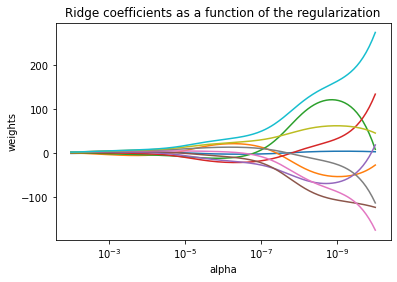

In [4]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### [**Classification de documents textuels à l'aide de caractéristiques rares**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/text/plot_document_classification_20newsgroups.ipynb)<br/>([*Classification of text documents using sparse features*](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html))

### 👌 [**Exemple ⭐⭐⭐⭐** : Les pièges courants dans l'interprétation des coefficients des modèles linéaires](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py)

Dans les modèles linéaires, la valeur cible est modélisée comme une combinaison linéaire des caractéristiques (voir la section [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html#linear-model) du Guide de l'utilisateur pour une description des modèles linéaires disponibles dans scikit-learn). Les coefficients dans plusieurs modèles linéaires représentent la relation entre une caractéristique donnée, $X_i$ et la cible, $y$, en supposant que toutes les autres caractéristiques restent constantes ([wkpd:dépendance conditionnelle](https://en.wikipedia.org/wiki/Conditional_dependence)). Ceci est différent de tracer $X_i$ par rapport à $y$ et d'ajuster d'une relation linéaire : dans ce cas, toutes les valeurs possibles des autres caractéristiques sont prises en compte dans l'estimation (dépendance marginale).

Cet exemple fournira quelques conseils pour interpréter le coefficient dans les modèles linéaires, en soulignant les problèmes qui surviennent lorsque le modèle linéaire n'est pas approprié pour décrire l'ensemble de données ou lorsque les caractéristiques sont corrélées.

Nous utiliserons les données de la [«Current Population Survey»](https://www.openml.org/search?type=data&sort=runs&id=534&status=active) de 1985 pour prédire le salaire en fonction de diverses caractéristiques telles que l'expérience, l'âge ou l'éducation.

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### L'ensemble de données : les salaires

Nous récupérons les données d'[OpenML](https://www.openml.org/). Notez que définir le paramètre `as_frame` sur `True` récupérera les données en tant que dataframe pandas.

In [3]:
from sklearn.datasets import fetch_openml

survey = fetch_openml(data_id=534, as_frame=True)

Ensuite, nous identifions les caractéristiques `X` et les cibles `y` : la colonne `WAGE` est notre variable cible (c'est-à-dire la variable que nous voulons prédire).

In [4]:
X = survey.data[survey.feature_names]
X.describe(include="all")

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
count,534.000000,534,534,534.000000,534,534.000000,534,534,534,534
unique,NaN,2,2,NaN,2,NaN,3,6,3,2
top,NaN,no,male,NaN,not_member,NaN,White,Other,Other,Married
freq,NaN,378,289,NaN,438,NaN,440,156,411,350
mean,13.018727,NaN,NaN,17.822097,NaN,36.833333,NaN,NaN,NaN,NaN
std,2.615373,NaN,NaN,12.379710,NaN,11.726573,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,NaN,NaN,NaN
25%,12.000000,NaN,NaN,8.000000,NaN,28.000000,NaN,NaN,NaN,NaN
50%,12.000000,NaN,NaN,15.000000,NaN,35.000000,NaN,NaN,NaN,NaN
75%,15.000000,NaN,NaN,26.000000,NaN,44.000000,NaN,NaN,NaN,NaN


Notez que l'ensemble de données contient des variables catégorielles et numériques. Nous devrons en tenir compte lors du prétraitement de l'ensemble de données par la suite.

In [5]:
X.head()

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8.0,no,female,21.0,not_member,35.0,Hispanic,Other,Manufacturing,Married
1,9.0,no,female,42.0,not_member,57.0,White,Other,Manufacturing,Married
2,12.0,no,male,1.0,not_member,19.0,White,Other,Manufacturing,Unmarried
3,12.0,no,male,4.0,not_member,22.0,White,Other,Other,Unmarried
4,12.0,no,male,17.0,not_member,35.0,White,Other,Other,Married


Notre cible de prédiction : le salaire (*Wage*). Les salaires sont décrits comme un nombre à virgule flottante en dollars par heure.

In [8]:
y = survey.target.values.ravel()
survey.target.head()

0    5.10
1    4.95
2    6.67
3    4.00
4    7.50
Name: WAGE, dtype: float64

Nous divisons l'échantillon en un ensemble de données d'entraînement et de test. Seul l'ensemble de données d'entraînement sera utilisé dans l'analyse exploratoire suivante. C'est une façon d'imiter une situation réelle où les prédictions sont effectuées sur une cible inconnue, et nous ne voulons pas que notre analyse et nos décisions soient biaisées par notre connaissance des données de test.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Tout d'abord, examinons les distributions des variables et les relations par paires entre elles. Seules les variables numériques seront utilisées. Dans le graphique suivant, chaque point représente un échantillon.

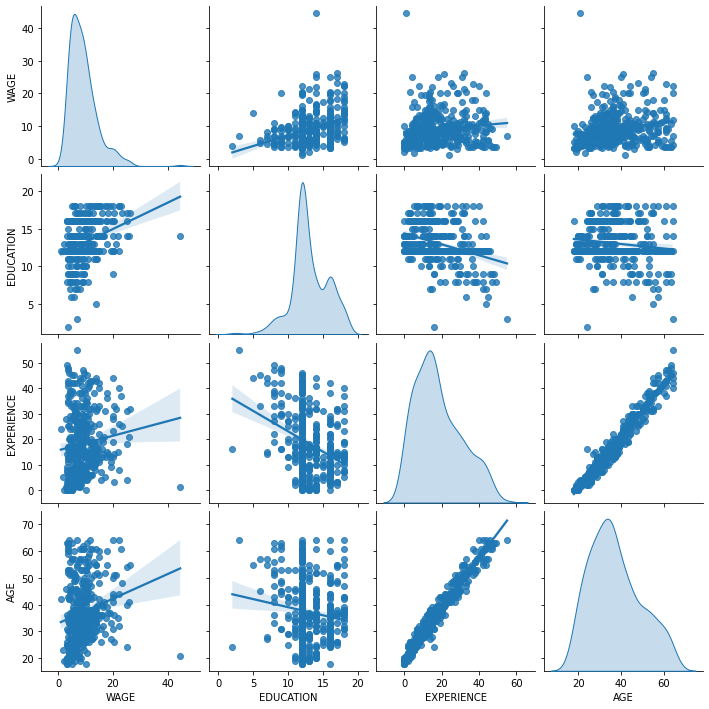

In [10]:
train_dataset = X_train.copy()
train_dataset.insert(0, "WAGE", y_train)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

Un examen attentif de la distribution WAGE révèle qu'elle a une longue queue. Pour cette raison, nous devrions prendre son logarithme pour le transformer approximativement en une distribution normale (les modèles linéaires tels que l'arête ou le lasso fonctionnent mieux pour une distribution normale d'erreur).

Le SALAIRE augmente lorsque l'ÉDUCATION augmente. Notez que la dépendance entre SALAIRE et ÉDUCATION représentée ici est une dépendance marginale, c'est-à-dire qu'elle décrit le comportement d'une variable spécifique sans maintenir les autres fixes.

De plus, l'EXPÉRIENCE et l'ÂGE sont fortement corrélés linéairement.

#### Le pipeline d'apprentissage automatique

Pour concevoir notre pipeline d'apprentissage automatique, nous vérifions d'abord manuellement le type de données que nous traitons :

In [11]:
survey.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EDUCATION   534 non-null    float64 
 1   SOUTH       534 non-null    category
 2   SEX         534 non-null    category
 3   EXPERIENCE  534 non-null    float64 
 4   UNION       534 non-null    category
 5   AGE         534 non-null    float64 
 6   RACE        534 non-null    category
 7   OCCUPATION  534 non-null    category
 8   SECTOR      534 non-null    category
 9   MARR        534 non-null    category
dtypes: category(7), float64(3)
memory usage: 17.2 KB


Comme vu précédemment, le jeu de données contient des colonnes avec différents types de données et nous devons appliquer un prétraitement spécifique pour chaque type de données. En particulier, les variables catégorielles ne peuvent pas être incluses dans le modèle linéaire si elles ne sont pas d'abord codées sous forme d'entiers. De plus, pour éviter que les caractéristiques catégorielles soient traitées comme des valeurs ordonnées, nous devons les encoder à chaud. Notre pré-processeur va

* encoder à chaud (*one-hot-encode*) (c'est-à-dire générer une colonne par catégorie) les colonnes catégorielles, uniquement pour les variables catégorielles non binaires ;
* en première approche (nous verrons plus tard comment la normalisation des valeurs numériques affectera notre discussion), gardez les valeurs numériques telles qu'elles sont.

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["RACE", "OCCUPATION", "SECTOR", "MARR", "UNION", "SEX", "SOUTH"]
numerical_columns = ["EDUCATION", "EXPERIENCE", "AGE"]

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)

Pour décrire l'ensemble de données comme un modèle linéaire, nous utilisons un régresseur d'arête avec une très petite régularisation et pour modéliser le logarithme du WAGE.

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
    ),
)

#### Prétraitement de la cible

On commence par ajuster le modèle.

In [14]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['RACE', 'OCCUPATION',
                                                   'SECTOR', 'MARR', 'UNION',
                                                   'SEX', 'SOUTH'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

Ensuite, nous vérifions les performances du modèle calculé en traçant ses prédictions sur l'ensemble de test et en calculant, par exemple, l'erreur absolue médiane du modèle.

In [15]:
from sklearn.metrics import median_absolute_error

y_pred = model.predict(X_train)

mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} $/hour"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} $/hour"

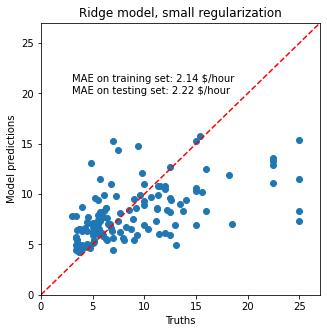

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(3, 20, string_score)
plt.title("Ridge model, small regularization")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

Le modèle appris est loin d'être un bon modèle faisant des prédictions précises : c'est évident quand on regarde le graphique ci-dessus, où les bonnes prédictions devraient se situer sur la ligne rouge.

Dans la section suivante, nous interpréterons les coefficients du modèle. Ce faisant, nous devons garder à l'esprit que toute conclusion que nous tirons concerne le modèle que nous construisons, plutôt que le véritable processus de génération (du monde réel) des données.

#### Interprétation des coefficients : l'échelle compte

Tout d'abord, nous pouvons jeter un œil aux valeurs des coefficients du régresseur que nous avons ajusté.

In [17]:
feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs

,Coefficients
RACE_Hispanic,-0.013550
RACE_Other,-0.009106
RACE_White,0.022563
OCCUPATION_Clerical,0.000055
OCCUPATION_Management,0.090538
OCCUPATION_Other,-0.025091
OCCUPATION_Professional,0.071974
OCCUPATION_Sales,-0.046626
OCCUPATION_Service,-0.091043
SECTOR_Construction,-0.000139


Le coefficient AGE est exprimé en « dollars/heure par années de vie » tandis que celui de l'ÉDUCATION est exprimé en « dollars/heure par années d'études ». Cette représentation des coefficients a l'avantage de clarifier les prédictions pratiques du modèle : une augmentation d'1 année en AGE signifie une diminution de 0.030867 dollars/heure, tandis qu'une augmentation d'1 année en ÉDUCATION signifie une augmentation de 0.054699 dollars/heure. Par contre, les variables catégorielles (comme UNION ou SEX) sont des nombres adimensionnels prenant soit la valeur 0 soit 1. Leurs coefficients sont exprimés en dollars/heure. Ensuite, nous ne pouvons pas comparer l'amplitude de différents coefficients puisque les caractéristiques ont des échelles naturelles différentes, et donc des plages de valeurs, en raison de leur unité de mesure différente. Ceci est plus visible si nous traçons les coefficients.

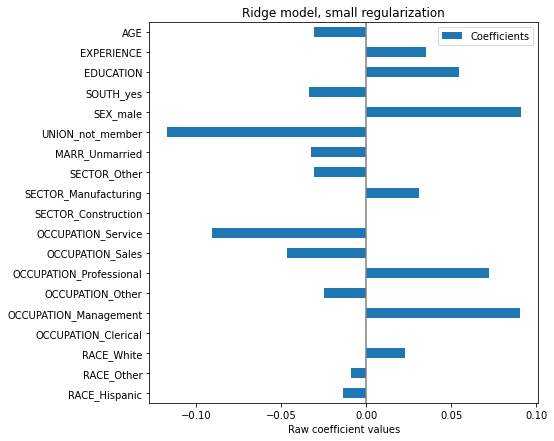

In [18]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

En effet, d'après le graphique ci-dessus, le facteur le plus important dans la détermination du SALAIRE semble être la variable UNION, même si notre intuition pourrait nous dire que des variables comme EXPÉRIENCE devraient avoir plus d'impact.

Regarder le graphique des coefficients pour évaluer l'importance des caractéristiques peut être trompeur car certains d'entre eux varient à petite échelle, tandis que d'autres, comme AGE, varient beaucoup plus, sur plusieurs décennies.

Ceci est visible si nous comparons les écarts-types de différentes caractéristiques.

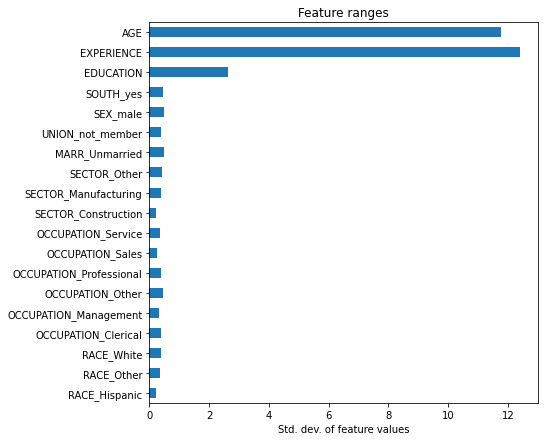

In [19]:
X_train_preprocessed = pd.DataFrame(
    model[:-1].transform(X_train), columns=feature_names
)

X_train_preprocessed.std(axis=0).plot.barh(figsize=(9, 7))
plt.title("Feature ranges")
plt.xlabel("Std. dev. of feature values")
plt.subplots_adjust(left=0.3)

Multiplier les coefficients par l'écart type de l'élément connexe réduirait tous les coefficients à la même unité de mesure. Comme nous le verrons par la suite cela revient à normaliser les variables numériques à leur écart-type, comme

$y = \sum \beta_i \times X_i = \sum (\beta_i \times \sigma_i)(X_i/\sigma_i)$.

De cette façon, nous soulignons que plus la variance d'une caractéristique est grande, plus le poids du coefficient correspondant sur la sortie est grand, toutes choses étant égales par ailleurs.

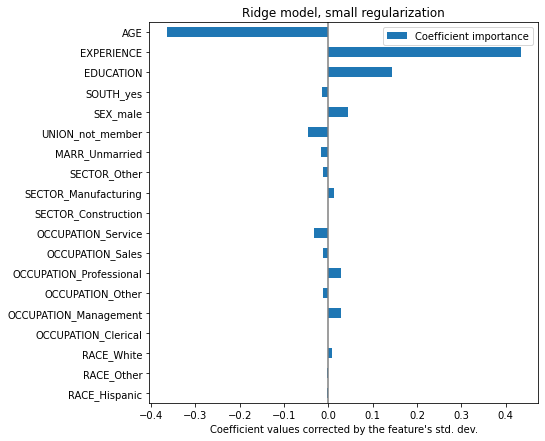

In [20]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_ * X_train_preprocessed.std(axis=0),
    columns=["Coefficient importance"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.xlabel("Coefficient values corrected by the feature's std. dev.")
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Maintenant que les coefficients ont été mis à l'échelle, nous pouvons les comparer en toute sécurité.

**Avertissement** Pourquoi le graphique ci-dessus suggère-t-il qu'une augmentation de l'âge entraîne une diminution du salaire ? Pourquoi le pairplot initial dit le contraire ?

Le graphique ci-dessus nous renseigne sur les dépendances entre une fonctionnalité spécifique et la cible lorsque toutes les autres fonctionnalités restent constantes, c'est-à-dire les dépendances conditionnelles. Une augmentation de l'AGE induira une diminution du SALAIRE lorsque toutes les autres caractéristiques restent constantes. Au contraire, une augmentation de l'EXPERIENCE induira une augmentation du SALAIRE lorsque toutes les autres caractéristiques restent constantes. Aussi, l'ÂGE, l'EXPÉRIENCE et l'ÉDUCATION sont les trois variables qui influencent le plus le modèle.

#### Vérification de la variabilité des coefficients

Nous pouvons vérifier la variabilité des coefficients par validation croisée : c'est une forme de perturbation des données (liée au rééchantillonnage).

Si les coefficients varient considérablement lors de la modification de l'ensemble de données d'entrée, leur robustesse n'est pas garantie et ils doivent probablement être interprétés avec prudence.

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_ * est[:-1].transform(X.iloc[train_idx]).std(axis=0)
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(X, y))
    ],
    columns=feature_names,
)

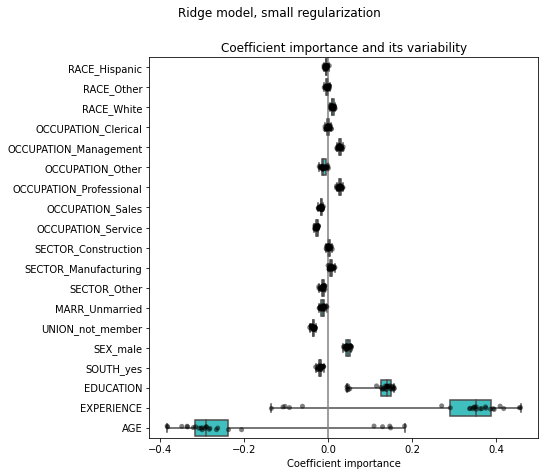

In [22]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.suptitle("Ridge model, small regularization")
plt.subplots_adjust(left=0.3)

#### Le problème des variables corrélées

Les coefficients AGE et EXPERIENCE sont affectés par une forte variabilité qui pourrait être due à la colinéarité entre les 2 caractéristiques : comme AGE et EXPERIENCE varient ensemble dans les données, leur effet est difficile à distinguer.

Pour vérifier cette interprétation, nous traçons la variabilité des coefficients AGE et EXPERIENCE.

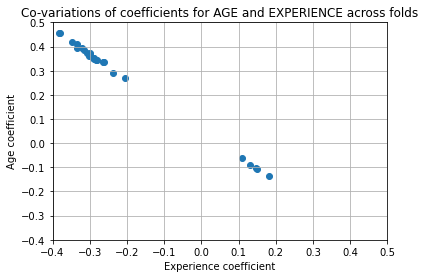

In [23]:
plt.ylabel("Age coefficient")
plt.xlabel("Experience coefficient")
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title("Co-variations of coefficients for AGE and EXPERIENCE across folds")

Co-variations des coefficients pour l'ÂGE et l'EXPÉRIENCE à travers les plis

Deux régions sont peuplées : lorsque le coefficient EXPERIENCE est positif celui de l'AGE est négatif et vice-versa.

Pour aller plus loin, nous supprimons l'une des 2 fonctionnalités et vérifions quel est l'impact sur la stabilité du modèle.

In [24]:
column_to_drop = ["AGE"]

cv_model = cross_validate(
    model,
    X.drop(columns=column_to_drop),
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_
        * est[:-1].transform(X.drop(columns=column_to_drop).iloc[train_idx]).std(axis=0)
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(X, y))
    ],
    columns=feature_names[:-1],
)

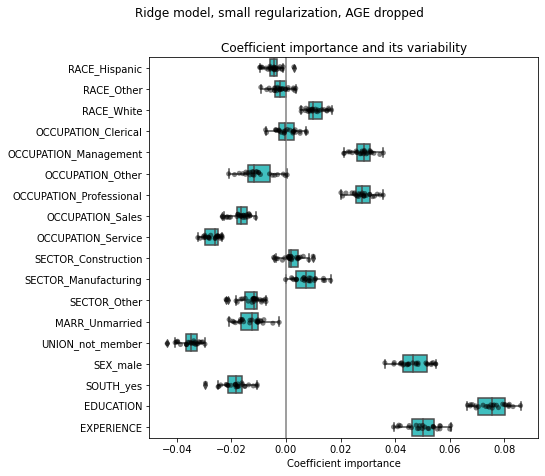

In [25]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color=".5")
plt.title("Coefficient importance and its variability")
plt.xlabel("Coefficient importance")
plt.suptitle("Ridge model, small regularization, AGE dropped")
plt.subplots_adjust(left=0.3)

L'estimation du coefficient EXPERIENCE montre maintenant une variabilité très réduite. L'EXPÉRIENCE reste importante pour tous les modèles entraînés lors de la validation croisée.

#### Prétraitement des variables numériques

Comme indiqué ci-dessus (voir ["Le pipeline d'apprentissage automatique"](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#the-pipeline)), nous pourrions également choisir de mettre à l'échelle les valeurs numériques avant d'entraîner le modèle. Cela peut être utile lorsque nous appliquons une quantité similaire de régularisation à tous dans l'arête. Le préprocesseur est redéfini afin de soustraire la moyenne et les variables d'échelle à la variance unitaire.

In [27]:
from sklearn.preprocessing import StandardScaler

preprocessor = make_column_transformer(
    (OneHotEncoder(drop="if_binary"), categorical_columns),
    (StandardScaler(), numerical_columns),
)

Le modèle demeure inchangé.

In [28]:
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
    ),
)
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['RACE', 'OCCUPATION',
                                                   'SECTOR', 'MARR', 'UNION',
                                                   'SEX', 'SOUTH']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['EDUCATION', 'EXPERIENCE',
                                                   'AGE'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

Encore une fois, nous vérifions les performances du modèle calculé en utilisant, par exemple, l'erreur absolue médiane du modèle et le coefficient R^2.

In [29]:
y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} $/hour"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} $/hour"

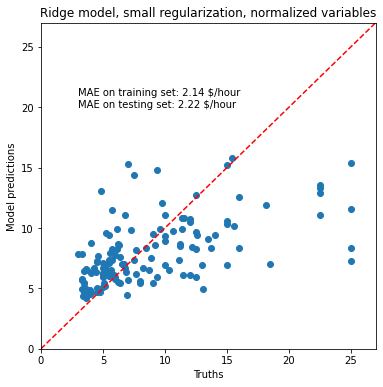

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title("Ridge model, small regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

Pour l'analyse des coefficients, la mise à l'échelle n'est pas nécessaire cette fois car elle a été effectuée lors de l'étape de prétraitement

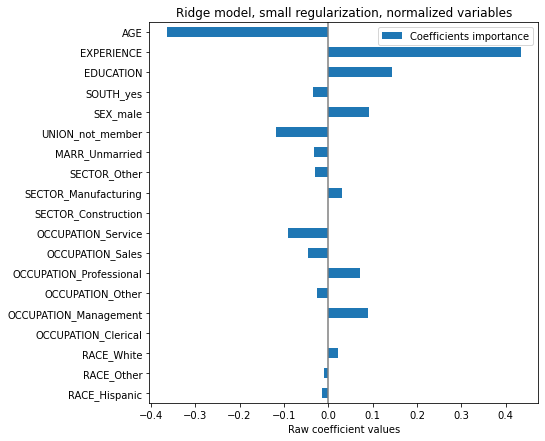

In [31]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization, normalized variables")
plt.xlabel("Raw coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Nous inspectons maintenant les coefficients sur plusieurs plis de validation croisée. Comme dans l'exemple ci-dessus, nous n'avons pas besoin de mettre à l'échelle les coefficients par le std. dév. des valeurs de caractéristiques puisque cette mise à l'échelle a déjà été effectuée dans l'étape de prétraitement du pipeline.

In [32]:
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].regressor_.coef_ for est in cv_model["estimator"]], columns=feature_names
)

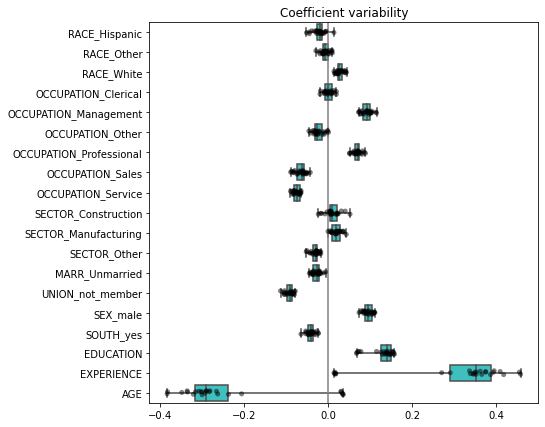

In [33]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

Le résultat est assez similaire au cas non normalisé.

#### Modèles linéaires avec régularisation

Dans la pratique de l'apprentissage automatique, la régression ridge est plus souvent utilisée avec une régularisation non négligeable.

Ci-dessus, nous avons limité cette régularisation à un très petit montant. La régularisation améliore le conditionnement du problème et réduit la variance des estimations. [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) applique une validation croisée afin de déterminer quelle valeur du paramètre de régularisation (`alpha`) est la mieux adaptée à la prédiction.

In [34]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-10, 10, 21)  # alpha values to be chosen from by cross-validation
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=RidgeCV(alphas=alphas),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['RACE', 'OCCUPATION',
                                                   'SECTOR', 'MARR', 'UNION',
                                                   'SEX', 'SOUTH']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['EDUCATION', 'EXPERIENCE',
                                                   'AGE'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]))))])

On vérifie d'abord quelle valeur de $\alpha$ a été sélectionnée.

In [35]:
model[-1].regressor_.alpha_

10.0

Ensuite, nous vérifions la qualité des prédictions.

In [36]:
y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} $/hour"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} $/hour"

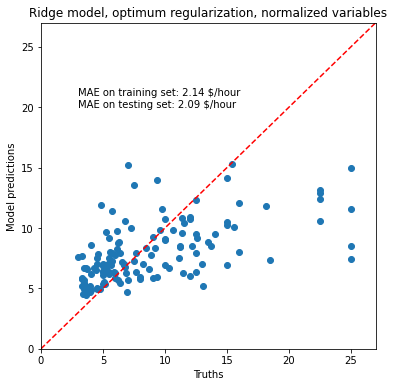

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title("Ridge model, optimum regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

La capacité à reproduire les données du modèle régularisé est similaire à celle du modèle non régularisé.

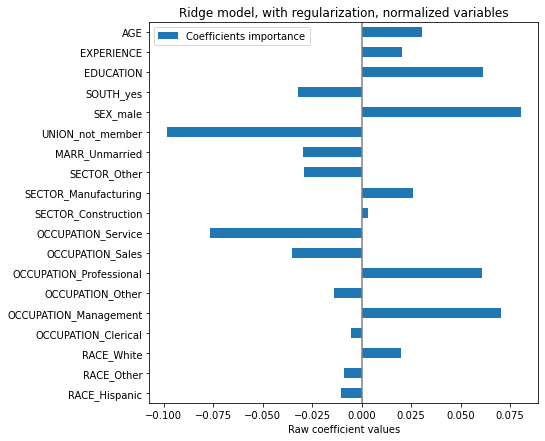

In [38]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, with regularization, normalized variables")
plt.xlabel("Raw coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Les coefficients sont sensiblement différents. Les coefficients AGE et EXPERIENCE sont tous deux positifs mais ils ont maintenant moins d'influence sur la prédiction.

La régularisation réduit l'influence des variables corrélées sur le modèle car le poids est partagé entre les deux variables prédictives, de sorte qu'aucune des deux n'aurait de poids forts.

En revanche, les poids obtenus avec la régularisation sont plus stables (voir la section Guide de l'utilisateur de [la régression et de la classification Ridge](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)). Cette stabilité accrue est visible sur le graphique, obtenu à partir de perturbations de données, dans une validation croisée. Ce tracé peut être comparé au précédent.

In [39]:
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].regressor_.coef_ for est in cv_model["estimator"]], columns=feature_names
)

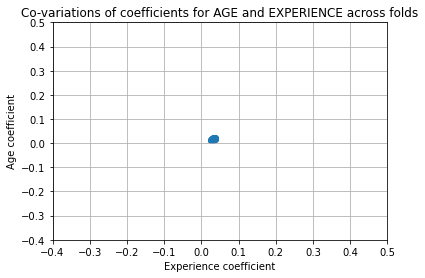

In [40]:
plt.ylabel("Age coefficient")
plt.xlabel("Experience coefficient")
plt.grid(True)
plt.xlim(-0.4, 0.5)
plt.ylim(-0.4, 0.5)
plt.scatter(coefs["AGE"], coefs["EXPERIENCE"])
_ = plt.title("Co-variations of coefficients for AGE and EXPERIENCE across folds")

#### Modèles linéaires à coefficients creux

Une autre possibilité de prendre en compte des variables corrélées dans l'ensemble de données consiste à estimer des coefficients épars. D'une certaine manière, nous l'avons déjà fait manuellement lorsque nous avons supprimé la colonne AGE dans une précédente estimation d'arête.

Les modèles Lasso (voir la section [Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lasso) du Guide de l'utilisateur ) estiment les coefficients parcimonieux. [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) applique une validation croisée afin de déterminer quelle valeur du paramètre de régularisation (`alpha`) est la mieux adaptée à l'estimation du modèle.

In [41]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-10, 10, 21)  # alpha values to be chosen from by cross-validation
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=LassoCV(alphas=alphas, max_iter=100_000),
        func=np.log10,
        inverse_func=sp.special.exp10,
    ),
)

_ = model.fit(X_train, y_train)

On vérifie d'abord quelle valeur de $\alpha$ a été sélectionnée.

In [42]:
model[-1].regressor_.alpha_

0.001

Ensuite, nous vérifions la qualité des prédictions.

In [43]:
y_pred = model.predict(X_train)
mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae:.2f} $/hour"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAE on testing set: {mae:.2f} $/hour"

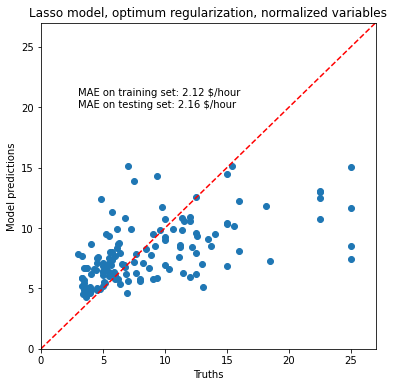

In [44]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.text(3, 20, string_score)

plt.title("Lasso model, optimum regularization, normalized variables")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
plt.xlim([0, 27])
_ = plt.ylim([0, 27])

Pour notre ensemble de données, encore une fois, le modèle n'est pas très prédictif.

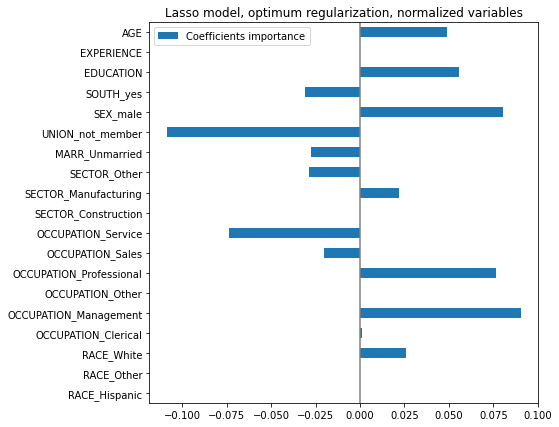

In [45]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Lasso model, optimum regularization, normalized variables")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

Un modèle Lasso identifie la corrélation entre l'ÂGE et l'EXPÉRIENCE et supprime l'un d'eux pour les besoins de la prédiction.

Il est important de garder à l'esprit que les coefficients qui ont été supprimés peuvent toujours être liés au résultat par eux-mêmes : le modèle a choisi de les supprimer car ils n'apportent que peu ou pas d'informations supplémentaires en plus des autres caractéristiques. De plus, cette sélection est instable pour les caractéristiques corrélées et doit être interprétée avec prudence.

En effet, nous pouvons vérifier la variabilité des coefficients à travers les plis.

In [46]:
cv_model = cross_validate(
    model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [est[-1].regressor_.coef_ for est in cv_model["estimator"]], columns=feature_names
)

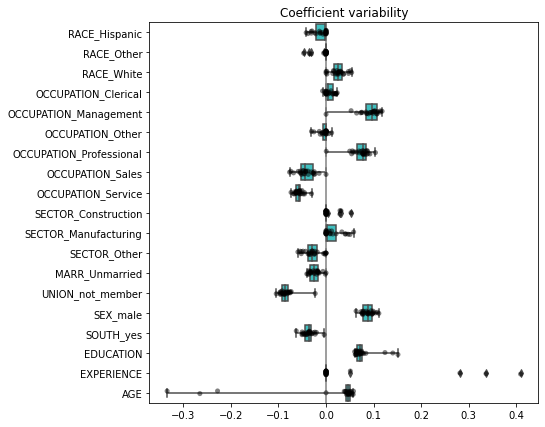

In [47]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=100)
plt.axvline(x=0, color=".5")
plt.title("Coefficient variability")
plt.subplots_adjust(left=0.3)

On observe que les coefficients AGE et EXPERIENCE varient beaucoup selon les plis.

#### Leçons apprises

* Les coefficients doivent être mis à l'échelle selon la même unité de mesure pour récupérer l'importance des caractéristiques. Les mettre à l'échelle avec l'écart-type de la fonction est un proxy utile.

* Les coefficients dans les modèles linéaires multivariés représentent la dépendance entre une caractéristique donnée et la cible, conditionnelle aux autres caractéristiques.

* Les caractéristiques corrélées induisent des instabilités dans les coefficients des modèles linéaires et leurs effets ne peuvent pas être bien séparés.

* Différents modèles linéaires réagissent différemment à la corrélation des caractéristiques et les coefficients peuvent varier considérablement les uns des autres.

* L'inspection des coefficients à travers les plis d'une boucle de validation croisée donne une idée de leur stabilité.

## 👌 1.1.2.3. Complexité du "Ridge"

Cette méthode a le même ordre de complexité que les moindres carrés ordinaires.

## 👌 1.1.2.4. Définition du paramètre de régularisation : leave-one-out Cross-Validation

[RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) implémente la régression d'arête avec validation croisée intégrée du paramètre alpha. L'objet fonctionne de la même manière que GridSearchCV sauf qu'il est par défaut à Leave-One-Out Cross-Validation :

In [48]:
import numpy as np
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
# RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
#      1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))
reg.alpha_
# 0.01

0.01

La spécification de la valeur de l'attribut [`cv`](https://scikit-learn.org/stable/glossary.html#term-cv) déclenchera l'utilisation de la validation croisée avec [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), par exemple `cv=10` pour une validation croisée 10 fois, plutôt que la validation croisée Leave-One-Out.

Références
* « Notes on Regularized Least Squares », Rifkin & Lippert ([**rapport technique**](http://cbcl.mit.edu/publications/ps/MIT-CSAIL-TR-2007-025.pdf), [**diapositives de cours**](https://www.mit.edu/~9.520/spring07/Classes/rlsslides.pdf)).

# 1.1.3. Lasso

Le Lasso est un modèle linéaire qui estime des coefficients avec parcimonie. Il est utile dans certains contextes en raison de sa tendance à préférer les solutions avec moins de coefficients non nuls, réduisant ainsi le nombre de caractéristiques dont dépend la solution donnée. Pour cette raison, Lasso et ses variantes sont fondamentales dans le domaine de la détection compressée. Sous certaines conditions, il peut récupérer l'ensemble exact des coefficients non nuls (voir [Compressive sensing : tomography reconstruction with L1 prior (Lasso)](https://scikit-learn.org/stable/auto_examples/applications/plot_tomography_l1_reconstruction.html#sphx-glr-auto-examples-applications-plot-tomography-l1-reconstruction-py)).

Mathématiquement, il s'agit d'un modèle linéaire avec un terme de régularisation ajouté. La fonction objectif à minimiser est :

$\displaystyle\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$

L'estimation au lasso résout donc la minimisation de la pénalité des moindres carrés avec addition de $\alpha ||w||_1$, où $\alpha$ est une constante et $||w||_1$ est la $\ell_1$-norme du vecteur coefficient.

L'implémentation dans la classe [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) utilise la descente de coordonnées comme algorithme pour ajuster les coefficients. Voir [Régression du moindre angle](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression) pour une autre implémentation :

In [1]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
# Lasso(alpha=0.1)
reg.predict([[1, 1]])
# array([0.8])

array([0.8])

La fonction [lasso_path](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lasso_path.html#sklearn.linear_model.lasso_path) est utile pour les tâches de niveau inférieur, car elle calcule les coefficients le long du chemin complet des valeurs possibles.

### [**Exemple ⭐⭐⭐** : Lasso et filet élastique pour les signaux clairsemés](https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py)

Estimation des modèles de régression Lasso et Elastic-Net sur un signal creux généré manuellement et corrompu par un bruit additif. Les coefficients estimés sont comparés à la vérité terrain.

#### Génération des données

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

np.random.seed(42)

n_samples, n_features = 50, 100
X = np.random.randn(n_samples, n_features)

# Decreasing coef w. alternated signs for visualization
idx = np.arange(n_features)
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)

# Add noise
y += 0.01 * np.random.normal(size=n_samples)

# Split data in train set and test set
n_samples = X.shape[0]
X_train, y_train = X[: n_samples // 2], y[: n_samples // 2]
X_test, y_test = X[n_samples // 2 :], y[n_samples // 2 :]

#### Lasso

In [3]:
from sklearn.linear_model import Lasso

alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1)
r^2 on test data : 0.658064


#### ElasticNet

In [5]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.642515


#### Tracé

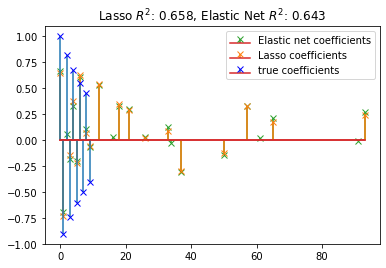

In [6]:
m, s, _ = plt.stem(
    np.where(enet.coef_)[0],
    enet.coef_[enet.coef_ != 0],
    markerfmt="x",
    label="Elastic net coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(
    np.where(lasso.coef_)[0],
    lasso.coef_[lasso.coef_ != 0],
    markerfmt="x",
    label="Lasso coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#ff7f0e")
plt.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label="true coefficients",
    markerfmt="bx",
    use_line_collection=True,
)

plt.legend(loc="best")
plt.title(
    "Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f" % (r2_score_lasso, r2_score_enet)
)
plt.show()

### [**Exemple ⭐⭐⭐⭐** : Détection compressive : reconstruction tomographique avec L1 préalable (Lasso)](https://scikit-learn.org/stable/auto_examples/applications/plot_tomography_l1_reconstruction.html#sphx-glr-auto-examples-applications-plot-tomography-l1-reconstruction-py)

Cet exemple montre la reconstruction d'une image à partir d'un ensemble de projections parallèles, acquises selon différents angles. Un tel ensemble de données est acquis en tomodensitométrie (CT).

Sans information préalable sur l'échantillon, le nombre de projections nécessaires pour reconstruire l'image est de l'ordre de la taille linéaire `l` de l'image (en pixels). Pour simplifier, nous considérons ici une image clairsemée, où seuls les pixels à la frontière des objets ont une valeur non nulle. De telles données pourraient correspondre par exemple à un matériau cellulaire. Notez cependant que la plupart des images sont clairsemées dans une base différente, comme les ondelettes de Haar. Seules `l/7` projections sont acquises, il faut donc utiliser l'information a priori disponible sur l'échantillon (sa parcimonie) : c'est un exemple de **détection compressive**.

L'opération de projection tomographique est une transformation linéaire. En plus du terme de fidélité aux données correspondant à une régression linéaire, nous pénalisons la norme L1 de l'image pour rendre compte de sa parcimonie. Le problème d'optimisation qui en résulte s'appelle le Lasso. Nous utilisons la classe [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), qui utilise l'algorithme de descente de coordonnées. Il est important de noter que cette implémentation est plus efficace en termes de calcul sur une matrice clairsemée que l'opérateur de projection utilisé ici.

La reconstruction avec pénalisation L1 donne un résultat sans erreur (tous les pixels sont étiquetés avec succès avec 0 ou 1), même si du bruit a été ajouté aux projections. En comparaison, une pénalisation L2 ([Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)) produit un grand nombre d'erreurs d'étiquetage pour les pixels. Des artefacts importants sont observés sur l'image reconstruite, contrairement à la pénalisation L1. Notez en particulier l'artefact circulaire séparant les pixels dans les coins, qui a contribué à moins de projections que le disque central.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_tomography_l1_reconstruction_001.png)

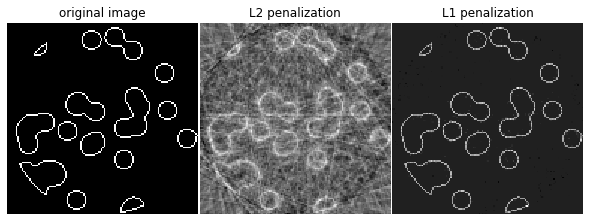

In [7]:
# Author: Emmanuelle Gouillart <emmanuelle.gouillart@nsup.org>
# License: BSD 3 clause

import numpy as np
from scipy import sparse
from scipy import ndimage
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


def _weights(x, dx=1, orig=0):
    x = np.ravel(x)
    floor_x = np.floor((x - orig) / dx).astype(np.int64)
    alpha = (x - orig - floor_x * dx) / dx
    return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))


def _generate_center_coordinates(l_x):
    X, Y = np.mgrid[:l_x, :l_x].astype(np.float64)
    center = l_x / 2.0
    X += 0.5 - center
    Y += 0.5 - center
    return X, Y


def build_projection_operator(l_x, n_dir):
    """Compute the tomography design matrix.

    Parameters
    ----------

    l_x : int
        linear size of image array

    n_dir : int
        number of angles at which projections are acquired.

    Returns
    -------
    p : sparse matrix of shape (n_dir l_x, l_x**2)
    """
    X, Y = _generate_center_coordinates(l_x)
    angles = np.linspace(0, np.pi, n_dir, endpoint=False)
    data_inds, weights, camera_inds = [], [], []
    data_unravel_indices = np.arange(l_x**2)
    data_unravel_indices = np.hstack((data_unravel_indices, data_unravel_indices))
    for i, angle in enumerate(angles):
        Xrot = np.cos(angle) * X - np.sin(angle) * Y
        inds, w = _weights(Xrot, dx=1, orig=X.min())
        mask = np.logical_and(inds >= 0, inds < l_x)
        weights += list(w[mask])
        camera_inds += list(inds[mask] + i * l_x)
        data_inds += list(data_unravel_indices[mask])
    proj_operator = sparse.coo_matrix((weights, (camera_inds, data_inds)))
    return proj_operator


def generate_synthetic_data():
    """Synthetic binary data"""
    rs = np.random.RandomState(0)
    n_pts = 36
    x, y = np.ogrid[0:l, 0:l]
    mask_outer = (x - l / 2.0) ** 2 + (y - l / 2.0) ** 2 < (l / 2.0) ** 2
    mask = np.zeros((l, l))
    points = l * rs.rand(2, n_pts)
    mask[(points[0]).astype(int), (points[1]).astype(int)] = 1
    mask = ndimage.gaussian_filter(mask, sigma=l / n_pts)
    res = np.logical_and(mask > mask.mean(), mask_outer)
    return np.logical_xor(res, ndimage.binary_erosion(res))


# Generate synthetic images, and projections
l = 128
proj_operator = build_projection_operator(l, l // 7)
data = generate_synthetic_data()
proj = proj_operator @ data.ravel()[:, np.newaxis]
proj += 0.15 * np.random.randn(*proj.shape)

# Reconstruction with L2 (Ridge) penalization
rgr_ridge = Ridge(alpha=0.2)
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)

# Reconstruction with L1 (Lasso) penalization
# the best value of alpha was determined using cross validation
# with LassoCV
rgr_lasso = Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)

plt.figure(figsize=(8, 3.3))
plt.subplot(131)
plt.imshow(data, cmap=plt.cm.gray, interpolation="nearest")
plt.axis("off")
plt.title("original image")
plt.subplot(132)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation="nearest")
plt.title("L2 penalization")
plt.axis("off")
plt.subplot(133)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation="nearest")
plt.title("L1 penalization")
plt.axis("off")

plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)

plt.show()

### NB > Sélection de caractéristiques avec Lasso

Comme la régression Lasso produit des modèles parcimonieux, elle peut donc être utilisée pour effectuer une sélection de caractéristiques, comme détaillé dans la sélection de caractéristiques basée sur L1.

Les deux références suivantes expliquent les itérations utilisées dans le solveur de descente de coordonnées de scikit-learn, ainsi que le calcul de l'écart de dualité utilisé pour le contrôle de la convergence.

Références :

* "Chemin de régularisation pour les modèles linéaires généralisés par descente de coordonnées", Friedman, Hastie & Tibshirani, J Stat Softw, 2010 ([Paper](https://www.jstatsoft.org/article/view/v033i01/v33i01.pdf)).

* "An Interior-Point Method for Large-Scale L1-Regularized Least Squares", SJ Kim, K. Koh, M. Lustig, S. Boyd et D. Gorinevsky, dans IEEE Journal of Selected Topics in Signal Processing, 2007 ([Paper](https://web.stanford.edu/~boyd/papers/pdf/l1_ls.pdf))

### 1.1.3.1. Définition du paramètre de régularisation

Le paramètre `alpha` contrôle le degré de parcimonie des coefficients estimés.

#### Utilisation de la validation croisée

scikit-learn expose des objets qui définissent le paramètre alpha Lasso par validation croisée : [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) et [LassoLarsCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsCV.html#sklearn.linear_model.LassoLarsCV). [LassoLarsCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsCV.html#sklearn.linear_model.LassoLarsCV) est basé sur l'algorithme de régression du moindre angle expliqué ci-dessous.

Pour les ensembles de données de grande dimension avec de nombreuses caractéristiques colinéaires, [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) est le plus souvent préférable. Cependant, [LassoLarsCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsCV.html#sklearn.linear_model.LassoLarsCV) a l'avantage d'explorer des valeurs plus pertinentes du paramètre `alpha`, et si le nombre d'échantillons est très faible par rapport au nombre de caractéristiques, il est souvent plus rapide que [LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV).


#### Sélection de modèle basée sur des critères d'information

Alternativement, l'estimateur [LassoLarsIC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsIC.html#sklearn.linear_model.LassoLarsIC) propose d'utiliser le critère d'information d'Akaike (AIC) et le critère d'information de Bayes (BIC). Il s'agit d'une alternative moins coûteuse en termes de calcul pour trouver la valeur optimale d'alpha car le chemin de régularisation n'est calculé qu'une seule fois au lieu de $k$ + 1 fois lors de l'utilisation de la validation croisée $k$-fold.

En effet, ces critères sont calculés sur l'ensemble d'apprentissage en échantillon. En bref, ils pénalisent les scores trop optimistes des différents modèles Lasso par leur flexibilité (cf. section « Précisions mathématiques » ci-dessous).

Cependant, ces critères nécessitent une estimation correcte des degrés de liberté de la solution, sont dérivés pour de grands échantillons (résultats asymptotiques) et supposent que le modèle correct est celui des candidats à l'étude. Ils ont également tendance à se casser lorsque le problème est mal conditionné (par exemple, plus de fonctionnalités que d'échantillons).

##### Détails mathématiques

La définition de l'AIC (et donc du BIC) peut différer dans la littérature. Dans cette section, nous donnons plus d'informations concernant le critère calculé dans scikit-learn. Le critère AIC est défini comme suit :

$AIC = -2 \log(\hat{L}) + 2 d$

où $\hat{L}$ est le maximum de vraisemblance du modèle et $d$ est le nombre de paramètres (également appelés degrés de liberté dans la section précédente).

La définition de BIC remplace la constante 2 par $\log(N)$ :

$BIC = -2 \log(\hat{L}) + \log(N) d$

où $N$ est le nombre d'échantillons.

Pour un modèle gaussien linéaire, la log-vraisemblance maximale est définie comme suit :

$\log(\hat{L}) = - \frac{n}{2} \log(2 \pi) - \frac{n}{2} \ln(\sigma^2) - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{2\sigma^2}$

où $\sigma^2$ est une estimation de la variance du bruit, $y_i$ et $\hat{y}_i$ sont respectivement les cibles réelles et prévues, et $n$ est le nombre d'échantillons.

En insérant la log-vraisemblance maximale dans la formule AIC, on obtient :

$AIC = n \log(2 \pi \sigma^2) + \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sigma^2} + 2 d$

Le premier terme de l'expression ci-dessus est parfois ignoré car il s'agit d'une constante lorsque $\sigma^2$ est fourni. De plus, il est parfois affirmé que l'AIC est équivalent à la statistique $C_p$ [12](https://arxiv.org/abs/0712.0881). Au sens strict, cependant, il n'est équivalent qu'à une constante près et à un facteur multiplicatif.

Enfin, nous avons mentionné plus haut que $\sigma^2$ est une estimation de la variance du bruit. Dans [LassoLarsIC](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsIC.html#sklearn.linear_model.LassoLarsIC) lorsque le paramètre `noise_variance` n'est pas fourni (par défaut), la variance du bruit est estimée via l'estimateur sans biais [13](https://direct.mit.edu/neco/article-abstract/15/7/1691/6752/Comparison-of-Model-Selection-for-Regression?redirectedFrom=fulltext) défini comme :

$\sigma^2 = \displaystyle\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n - p}$

où $p$ est le nombre de caractéristiques et $\hat{y}_i$ est la cible prédite à l'aide d'une régression des moindres carrés ordinaires. Notez que cette formule n'est valide que lorsque `n_samples > n_features`.

# 👌 1.4 [Machines à vecteurs de support (SVM)](https://scikit-learn.org/stable/modules/svm.html)

Les **machines à vecteurs de support** (SVM) sont un ensemble de méthodes d'apprentissage supervisé utilisées pour la classification, la régression et la détection des valeurs aberrantes.

Les avantages des machines à vecteurs de support sont :
* Efficace dans les espaces de grande dimension.
* Toujours efficace dans les cas où le nombre de dimensions est supérieur au nombre d'échantillons.
* Utilise un sous-ensemble de points d'apprentissage dans la fonction de décision (appelés vecteurs de support), il est donc également efficace en mémoire.
* Polyvalent : différentes **fonctions du noyau** peuvent être spécifiées pour la fonction de décision. Des noyaux communs sont fournis, mais il est également possible de spécifier des noyaux *ad hoc*.

Les inconvénients des machines à vecteurs de support incluent :
* Si le nombre de caractéristiques est bien plus grand que le nombre d'échantillons, pour éviter le sur-apprentissage, le choix des fonctions du noyau et le terme de régularisation est crucial.
* Les SVM ne fournissent pas directement des estimations de probabilité, celles-ci sont calculées à l'aide d'une validation croisée quintuple coûteuse (voir Scores et probabilités, ci-dessous).

Les machines à vecteurs de support dans scikit-learn prennent en charge les vecteurs d'échantillon à la fois dense (`numpy.ndarray` et convertibles en celui-ci par `numpy.asarray`) et creux (tout `scipy.sparse`) en entrée. Cependant, pour utiliser une SVM pour faire des prédictions pour des données creuses, elle doit avoir été ajustée à ces données. Pour des performances optimales, utilisez `numpy.ndarray` ordonné en C (dense) ou `scipy.sparse.csr_matrix` (creuse) avec `dtype=float64`.

## 1.4.1. [Classification](https://scikit-learn.org/stable/modules/svm.html#classification)

[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC) et [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) sont des classes capables d'effectuer une classification binaire et multi-classes sur un jeu de données.

<mark>Images à insérer</mark>

[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) et [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC) sont des méthodes similaires, mais elles acceptent des ensembles de paramètres légèrement différents et ont des formulations mathématiques différentes (voir la section Formulation mathématique). D'autre part, [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) est une autre implémentation (plus rapide) de Support Vector Classification pour le cas d'un noyau linéaire. Notez que [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) n'accepte pas le paramètre `kernel`, puisqu'il est supposé être linéaire. Il lui manque également certains des attributs de [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) et [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC), comme `support_`.

Comme d'autres classifieurs, [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC) et [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) prennent en entrée deux tableaux : un tableau `X` de dimensions `(n_échantillons, n_caractéristiques)` contenant les échantillons d'apprentissage, et un tableau `y` d'étiquettes de classe (chaînes ou entiers), de forme `(n_échantillons)` : 

In [ ]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)
# SVC()

Après avoir été entraîné, le modèle peut être utilisé pour prédire de nouvelles valeurs :

In [ ]:
clf.predict([[2., 2.]])
# array([1])

La fonction de décision des SVM (détaillée dans la formulation mathématique) dépend d'un certain sous-ensemble des données d'apprentissage, appelés vecteurs de support. Certaines propriétés de ces vecteurs de support peuvent être trouvées dans les attributs `support_vectors_`, `support_` and `n_support_` :

In [ ]:
# get support vectors
clf.support_vectors_
# array([[0., 0.],
#        [1., 1.]])
# get indices of support vectors
clf.support_
# array([0, 1]...)
>>> # get number of support vectors for each class
clf.n_support_
# array([1, 1]...)

### [**Exemple ⭐** : SVM : Marge maximale séparant l'hyperplan](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py)

Tracez la marge maximale séparant l'hyperplan dans un ensemble de données séparables à deux classes à l'aide d'un classifieur Support Vector Machine avec noyau linéaire.

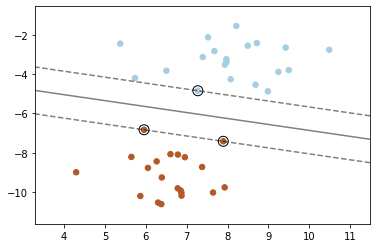

In [1]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

### [**Exemple ⭐** : SVM non linéaire](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py)

Effectuez une classification binaire à l'aide de SVC non linéaire avec le noyau RBF. La cible à prédire est un XOR des entrées.

La carte de couleur illustre la fonction de décision apprise par le SVC.

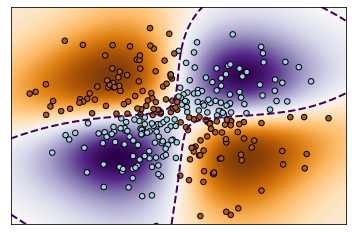

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma="auto")
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

### [**Exemple ⭐** : SVM-Anova : SVM avec sélection de caractéristique univariée](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html#sphx-glr-auto-examples-svm-plot-svm-anova-py)

Cet exemple montre comment effectuer une sélection de caractéristiques univariées avant d'exécuter un SVC (classificateur de vecteur de support) pour améliorer les scores de classification. Nous utilisons le jeu de données iris (4 caractéristiques) et ajoutons 36 caractéristiques non informatives. Nous pouvons constater que notre modèle atteint les meilleures performances lorsque nous sélectionnons environ 10 % des fonctionnalités.

#### Chargement des données avec lesquelles jouer

In [3]:
import numpy as np
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# Add non-informative features
rng = np.random.RandomState(0)
X = np.hstack((X, 2 * rng.random((X.shape[0], 36))))

#### Création du pipeline

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator

clf = Pipeline(
    [
        ("anova", SelectPercentile(chi2)),
        ("scaler", StandardScaler()),
        ("svc", SVC(gamma="auto")),
    ]
)

#### Tracé du score de validation croisée en fonction du centile des fonctionnalités

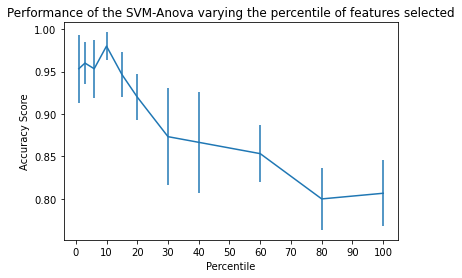

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()

### 1.4.1.1. Classification multi-classes

[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) et [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC) implémentent l'approche "un contre un" pour la classification multi-classes. Au total, `n_classes * (n_classes - 1) / 2` classifieurs sont construits et chacun entraîne les données de deux classes. Pour fournir une interface cohérente avec d'autres classifieurs, l'option `decision_function_shape` permet de transformer de manière monotone les résultats des classificateurs "un-vs-un" en une fonction de décision "un-vs-reste" de forme `(n_échantillons, n_classes)`.

In [6]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)
SVC(decision_function_shape='ovo')
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6
# 6
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes
# 4

4

D'autre part, [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) implémente une stratégie multi-classes "un-vs-reste", formant ainsi des modèles `n_classes`.

In [ ]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)
# LinearSVC()
dec = lin_clf.decision_function([[1]])
dec.shape[1]
# 4

Voir Formulation mathématique pour une description complète de la fonction de décision.

Notez que le [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) implémente également une stratégie multi-classes alternative, la SVM multi-classes formulée par Crammer et Singer [16], en utilisant l'option `multi_class='crammer_singer'`. En pratique, la classification un-vs-reste est généralement préférée, car les résultats sont pour la plupart similaires, mais le temps d'exécution est nettement inférieur.

Pour le [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) "un-contre-reste", les attributs `coef_` et `intercept_` ont respectivement la forme `(n_classes, n_features)` et `(n_classes,)`. Chaque ligne des coefficients correspond à l'un des classifieurs `n_classes` "un-vs-reste", idem pour les intercepts, dans l'ordre de la classe "one".

Dans le cas de [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) et [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC) "un-vs-un", la disposition des attributs est un peu plus compliquée. Dans le cas d'un noyau linéaire, les attributs `coef_` et `intercept_` ont respectivement la forme `(n_classes * (n_classes - 1) / 2, n_features)` et `(n_classes * (n_classes - 1) / 2)`. Ceci est similaire à la disposition de [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) décrite ci-dessus, chaque ligne correspondant maintenant à un classifieur binaire. L'ordre des classes 0 à $n$ est "0 vs 1", "0 vs 2", … "0 vs $n$", "1 vs 2", "1 vs 3", "1 vs $n$", … "$n-1$ vs $n$".

Les dimensions de `dual_coef_` sont `(n_classes-1, n_SV)` avec un cadre quelque peu difficile à saisir. Les colonnes correspondent aux vecteurs de support impliqués dans l'un des `n_classes * (n_classes - 1) / 2` classifieurs "un vs un". Chaque vecteur de support `v` a un double coefficient dans chacun des classificateurs `n_classes - 1` qui compare la classe de `v` à une autre classe. Notez que certains de ces coefficients duaux, mais pas tous, peuvent être nuls. Les `n_classes - 1` entrées dans chaque colonne sont ces doubles coefficients, ordonnés par la classe opposée.

Cela pourrait être plus clair avec un exemple: considérons un problème à trois classes avec la classe 0 ayant trois vecteurs de support $v^0_0, v^1_0, v^2_0$ et les classes 1 et 2 ayant deux vecteurs supports $v^0_1, v^1_1$ et $v^0_2, v^1_2$ respectivement. Pour chaque vecteur support $v^j_i$, il y a deux coefficients duaux. Appelons le coefficient de vecteur de support $v^j_i$ dans le classifieur entre les classes $i$ et $k\alpha^j_{i,k}$. Alors `dual_coef_` ressemble à ceci :

|Coefficients pour<br/>les SVs de classe 0|Coefficients pour<br/>les SVs de classe 1|Coefficients pour<br/>les SVs de classe 2|
|-|-|-|
|$\alpha^0_{0,1} \alpha^1_{0,1} \alpha^2_{0,1}$|$\alpha^0_{1,0} \alpha^1_{1,0}$|$\alpha^0_{2,0} \alpha^1_{2,0}$|
|$\alpha^0_{0,2} \alpha^1_{0,2} \alpha^2_{0,2}$|$\alpha^0_{1,2} \alpha^1_{1,2}$|$\alpha^0_{2,1} \alpha^1_{2,1}$|


### [**Exemple ⭐** : Tracé de différents classificateurs SVM dans l'ensemble de données iris](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py)

Comparaison de différents classifieurs SVM linéaires sur une projection 2D du jeu de données de l'iris. Nous ne considérons que les 2 premières caractéristiques de cet ensemble de données :
* Longueur des sépales
* Largeur des sépales

Cet exemple montre comment tracer la surface de décision pour quatre classificateurs SVM avec différents noyaux.

Les modèles linéaires `LinearSVC()` et `SVC(kernel='linear')` donnent des limites de décision légèrement différentes. Cela peut être une conséquence des différences suivantes :
* `LinearSVC` minimise la perte de charnière au carré tandis que `SVC` minimise la perte de charnière régulière.
* `LinearSVC` utilise la réduction multiclasse One-vs-All (également appelée One-vs-Rest) tandis que `SVC` utilise la réduction multiclasse One-vs-One.

Les deux modèles linéaires ont des frontières de décision linéaires (hyperplans qui se croisent) tandis que les modèles à noyau non linéaires (polynomial ou RBF gaussien) ont des frontières de décision non linéaires plus flexibles avec des dimensions qui dépendent du type de noyau et de ses paramètres.

**NB** > Bien que le tracé de la fonction de décision des classifieurs pour les ensembles de données 2D puisse aider à obtenir une compréhension intuitive de leur pouvoir expressif respectif, sachez que ces intuitions ne se généralisent pas toujours à des problèmes de grande dimension plus réalistes.

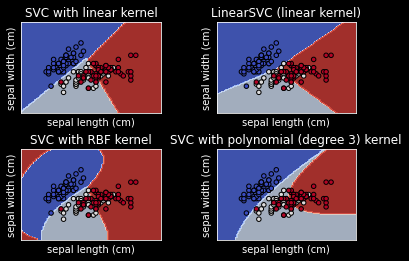

In [8]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib as mpl
mpl.style.use('dark_background')


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# 1.4.1.2. Scores et probabilités

La méthode `decision_function` de [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) et [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC) donne des scores par classe pour chaque échantillon (ou un seul score par échantillon dans le cas binaire). Lorsque l'option `probability` du constructeur est définie sur `True`, les estimations de probabilité d'appartenance à la classe (à partir des méthodes `predict_proba` et `predict_log_proba`) sont activées. Dans le cas binaire, les probabilités sont calibrées à l'aide de l'échelle de Platt [9](https://home.cs.colorado.edu/~mozer/Teaching/syllabi/6622/papers/Platt1999.pdf) : régression logistique sur les scores du SVM, ajustée par une validation croisée supplémentaire sur les données d'entraînement. Dans le cas multiclasse, ceci est étendu selon [10](https://www.csie.ntu.edu.tw/~cjlin/papers/svmprob/svmprob.pdf).

**Note** La même procédure d'étalonnage de probabilité est disponible pour tous les estimateurs via [CalibratedClassifierCV](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV) (voir Étalonnage de probabilité). Dans le cas de [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) et [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC), cette procédure est intégrée dans [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) qui est utilisée sous le capot, elle ne repose donc pas sur [CalibratedClassifierCV](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV) de scikit-learn.

La validation croisée impliquée dans la mise à l'échelle de Platt est une opération coûteuse pour les grands ensembles de données. De plus, les estimations de probabilité peuvent être incohérentes avec les scores :
* l'"argmax" des scores peut ne pas être l'argmax des probabilités
* dans la classification binaire, un échantillon peut être étiqueté par `predict` comme appartenant à la classe positive même si la sortie de `predict_proba` est inférieure à 0,5 ; et de même, il pourrait être étiqueté comme négatif même si la sortie de `predict_proba` est supérieure à 0,5.

La méthode de Platt est également connue pour avoir des problèmes théoriques. Si des scores de confiance sont requis, mais que ceux-ci ne doivent pas nécessairement être des probabilités, il est conseillé de définir `probability=False` et d'utiliser `decision_function` au lieu de `predict_proba`.

Veuillez noter que lorsque `decision_function_shape='ovr'` et `n_classes > 2`, contrairement à `decision_function`, la méthode `predict` n'essaie pas de rompre les liens par défaut. Vous pouvez définir `break_ties=True` pour que la sortie de `predict` soit identique à `np.argmax(clf.decision_function(...), axis=1)`, sinon la première classe parmi les classes liées sera toujours renvoyée ; mais gardez à l'esprit que cela a un coût de calcul. Voir Exemple de bris d'égalité SVM pour un exemple sur le bris d'égalité.

### [**Exemple ⭐⭐** : Exemple de bris d'égalité SVM](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_tie_breaking.html#sphx-glr-auto-examples-svm-plot-svm-tie-breaking-py)


Le bris d'égalité est coûteux si `decision_function_shape='ovr'`, et donc il n'est pas activé par défaut. Cet exemple illustre l'effet du paramètre `break_ties` pour un problème de classification multiclasse avec `decision_function_shape='ovr'`.

Les deux tracés ne diffèrent que dans la zone au milieu où les classes sont liées. Si `break_ties=False`, toutes les entrées de cette zone seraient classées dans une seule classe, alors que si `break_ties=True`, le mécanisme de partition créera une limite de décision non convexe dans cette zone.

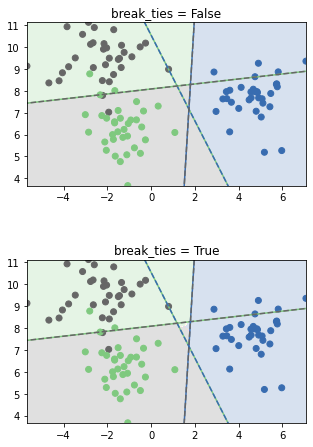

In [1]:
# Code source: Andreas Mueller, Adrin Jalali
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=27)

fig, sub = plt.subplots(2, 1, figsize=(5, 8))
titles = ("break_ties = False", "break_ties = True")

for break_ties, title, ax in zip((False, True), titles, sub.flatten()):

    svm = SVC(
        kernel="linear", C=1, break_ties=break_ties, decision_function_shape="ovr"
    ).fit(X, y)

    xlim = [X[:, 0].min(), X[:, 0].max()]
    ylim = [X[:, 1].min(), X[:, 1].max()]

    xs = np.linspace(xlim[0], xlim[1], 1000)
    ys = np.linspace(ylim[0], ylim[1], 1000)
    xx, yy = np.meshgrid(xs, ys)

    pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])

    colors = [plt.cm.Accent(i) for i in [0, 4, 7]]

    points = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
    classes = [(0, 1), (0, 2), (1, 2)]
    line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
    ax.imshow(
        -pred.reshape(xx.shape),
        cmap="Accent",
        alpha=0.2,
        extent=(xlim[0], xlim[1], ylim[1], ylim[0]),
    )

    for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
        line2 = -(line * coef[1] + intercept) / coef[0]
        ax.plot(line2, line, "-", c=colors[col[0]])
        ax.plot(line2, line, "--", c=colors[col[1]])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_aspect("equal")

plt.show()

### [**Exemple ⭐** : SVM : hyperplan séparateur pour les classes déséquilibrées](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html)

Trouvez l'hyperplan de séparation optimal à l'aide d'un SVC pour les classes déséquilibrées.

Nous trouvons d'abord le plan de séparation avec un SVC simple, puis traçons (en pointillés) l'hyperplan de séparation avec correction automatique pour les classes déséquilibrées.

**Note** Cet exemple fonctionnera également en remplaçant `SVC(kernel="linear")` par `SGDClassifier(loss="hinge")`. La définition du paramètre `loss` du [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) égal à `hinge` produira un comportement tel que celui d'un SVC avec un noyau linéaire.

Par exemple, essayez à la place du SVC :

        clf = SGDClassifier(n_iter=100, alpha=0.01)

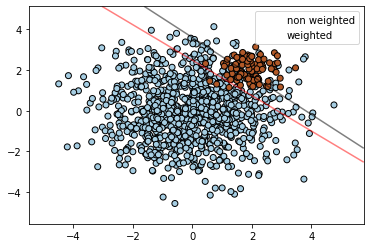

In [2]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="r",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [disp.surface_.collections[0], wdisp.surface_.collections[0]],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

### [**Exemple ⭐** : SVM : Échantillons pondérés](https://scikit-learn.org/stable/auto_examples/svm/plot_weighted_samples.html)

Trace la fonction de décision d'un ensemble de données pondéré, où la taille des points est proportionnelle à leur poids.

La pondération de l'échantillon remet à l'échelle le paramètre C, ce qui signifie que le classificateur met davantage l'accent sur l'obtention de ces points. L'effet peut souvent être subtil. Pour souligner l'effet ici, nous pondérons particulièrement les valeurs aberrantes, rendant la déformation de la frontière de décision très visible.

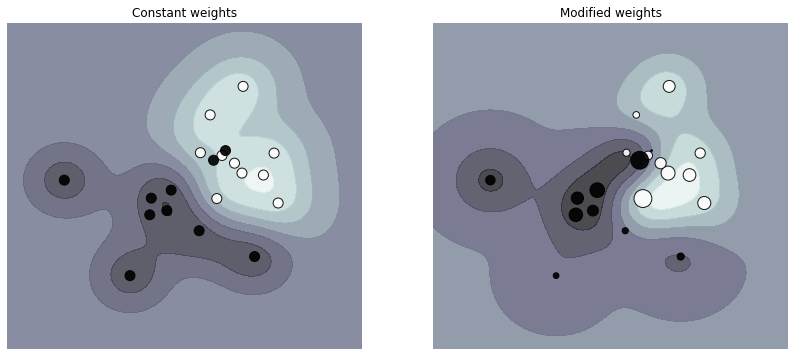

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# Fit the models.

# This model does not take into account sample weights.
clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

# This other model takes into account some dedicated sample weights.
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()

## 1.4.2. [Régression](https://scikit-learn.org/stable/modules/svm.html#regression)

La méthode de classification des vecteurs de support peut être étendue pour résoudre les problèmes de régression. Cette méthode s'appelle Support Vector Regression.

Le modèle produit par la classification des vecteurs de support (comme décrit ci-dessus) ne dépend que d'un sous-ensemble des données d'apprentissage, car la fonction de coût pour la construction du modèle ne se soucie pas des points d'apprentissage qui se trouvent au-delà de la marge. De manière analogue, le modèle produit par Support Vector Regression ne dépend que d'un sous-ensemble des données d'apprentissage, car la fonction de coût ignore les échantillons dont la prédiction est proche de leur cible.

Il existe trois implémentations différentes de la régression à vecteurs de support : [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR), [NuSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR) et [LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR). [LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR) fournit une implémentation plus rapide que [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR) mais ne considère que le noyau linéaire, tandis que [NuSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR) implémente une formulation légèrement différente de [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR) et [LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR). Voir Détails de mise en œuvre pour plus de détails.

Comme pour les classes de classification, la méthode `fit` prendra comme arguments les vecteurs `X, y`, seulement que dans ce cas `y` devrait avoir des valeurs à virgule flottante au lieu de valeurs entières :

In [1]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
regr = svm.SVR()
regr.fit(X, y)
# SVR()
regr.predict([[1, 1]])

array([1.5])

### [**Exemple ⭐⭐** : Prise en charge de la régression vectorielle (SVR) à l'aide de noyaux linéaires et non linéaires](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py)

Exemple jouet de régression 1D utilisant des noyaux linéaires, polynomiaux et RBF.

In [2]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

#### Génération des données d'exemple

In [3]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

#### Ajustement du modèle de régression

In [4]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

#### Visualisation des résulats

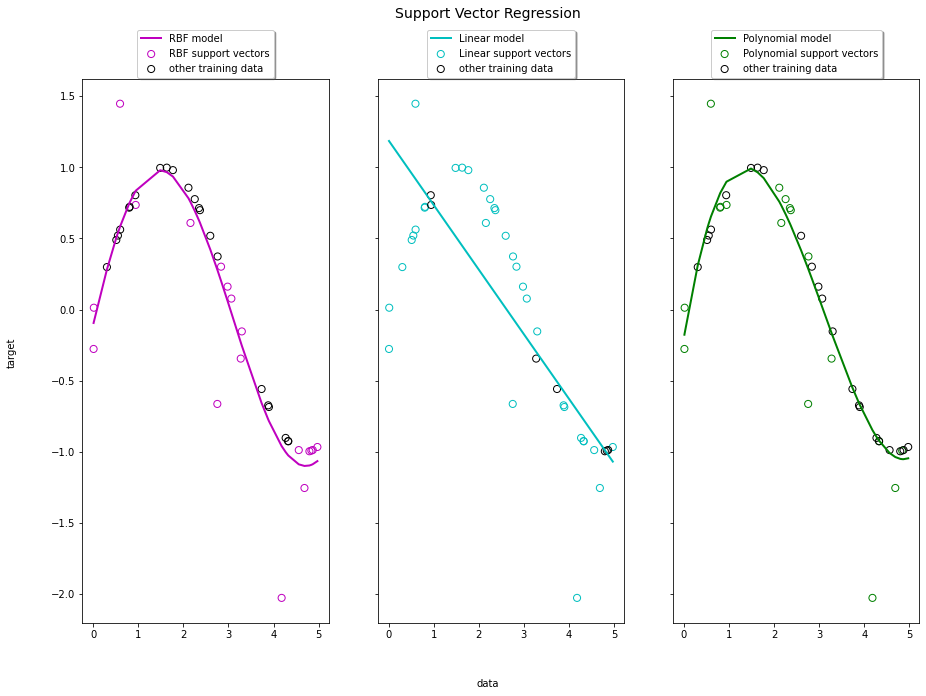

In [5]:
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## 1.4.3. [Estimation de densité, détection de nouveauté](https://scikit-learn.org/stable/modules/svm.html#density-estimation-novelty-detection)

La classe [OneClassSVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM) implémente un SVM à classe unique qui est utilisé dans la détection des valeurs aberrantes.

Voir [Détection de nouveauté et de valeurs aberrantes](https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection) pour la description et l'utilisation de OneClassSVM.

## 1.4.4. [Complexité](https://scikit-learn.org/stable/modules/svm.html#complexity)

Les machines à vecteurs de support sont des outils puissants, mais leurs besoins en calcul et en stockage augmentent rapidement avec le nombre de vecteurs d'entraînement. Le cœur d'un SVM est un problème de programmation quadratique (QP), séparant les vecteurs de support du reste des données d'apprentissage. Le solveur QP utilisé par l'implémentation basée sur [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) évolue entre $\mathcal{O}(n_{features} \times n^2_{samples})$
et $\mathcal{O}(n_{features} \times n^2_{samples})$ en fonction de l'efficacité avec laquelle le cache [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) est utilisé dans la pratique (selon l'ensemble de données). Si les données sont très rares $n_{features}$ devrait être remplacé par le nombre moyen de caractéristiques non nulles dans un vecteur échantillon.

Pour le cas linéaire, l'algorithme utilisé dans [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) par l'implémentation [liblinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/) est beaucoup plus efficace que son homologue [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) basé sur [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) et peut s'adapter de manière presque linéaire à des millions d'échantillons et/ou de fonctionnalités.

## 1.4.5. [Considérations pratiques](https://scikit-learn.org/stable/modules/svm.html#tips-on-practical-use)

### Éviter la copie de données

Pour [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR), [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC) et [NuSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR), si les données transmises à certaines méthodes ne sont pas contiguës et double précision dans l'ordre C, elles seront copiées avant d'appeler l'implémentation C sous-jacente. Vous pouvez vérifier si un tableau numpy donné est C-contigu en inspectant son attribut `flags`.

Pour [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) (et [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)), toute entrée transmise en tant que tableau numpy sera copiée et convertie en représentation interne [liblinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/) des données creuses (flottants à double précision et indices int32 de composants non nuls). Si vous souhaitez adapter un classifieur linéaire à grande échelle sans copier un tableau double précision numpy C-contigu dense en entrée, nous vous suggérons d'utiliser la classe [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) à la place. La fonction objective peut être configurée pour être presque identique au modèle [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC).

### Taille du cache du noyau

Pour [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR), [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC) et [NuSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR), la taille du cache du noyau a un fort impact sur les temps d'exécution pour les problèmes les plus larges. Si vous disposez de suffisamment de RAM, il est recommandé de définir `cache_size` sur une valeur supérieure à la valeur par défaut de 200 (Mo), telle que 500 (Mo) ou 1000 (Mo).

### Configurer C

`C` est à `1` par défaut et c'est un choix par défaut raisonnable. Si vous avez beaucoup d'observations bruitées, vous devez le diminuer : diminuer C correspond à plus de régularisation.

[LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) et [LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR) sont moins sensibles à C lorsqu'il devient grand, et les résultats de prédiction cessent de s'améliorer après un certain seuil. Pendant ce temps, des valeurs C plus grandes prendront plus de temps pour s'entraîner, parfois jusqu'à 10 fois plus longtemps, comme le montre [11](https://www.csie.ntu.edu.tw/~cjlin/papers/liblinear.pdf).

### Sensibilité à l'échelle des SVM

Les algorithmes de Support Vector Machine ne sont pas insensibles à l'échelle, il est donc fortement recommandé de mettre à l'échelle vos données. Par exemple, mettez à l'échelle chaque attribut sur le vecteur d'entrée X à [0,1] ou [-1,+1], ou normalisez-le pour avoir une moyenne de 0 et une variance de 1. Notez que la même mise à l'échelle doit être appliquée au vecteur de test pour obtenir des résultats significatifs. Cela peut être fait facilement en utilisant un [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) :

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())

Voir la section [Prétraitement des données](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing) pour plus de détails sur la mise à l'échelle et la normalisation.

### Concernant le paramètre de rétrécissement `shrinking`

citant [12](https://www.csie.ntu.edu.tw/~cjlin/papers/libsvm.pdf) : *Nous avons constaté que si le nombre d'itérations est important, la réduction peut raccourcir le temps d'apprentissage. Cependant, si nous résolvons vaguement le problème d'optimisation (par exemple, en utilisant une grande tolérance d'arrêt), le code sans utiliser le rétrécissement peut être beaucoup plus rapide.*

### Le paramètre `nu` dans [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC)/[OneClassSVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM)/[NuSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR)

Le paramètre `nu` dans [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC)/[OneClassSVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM)/[NuSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html#sklearn.svm.NuSVR) approxime la fraction des erreurs d'entraînement et des vecteurs de support.

### Equilibrage du SVC

Dans [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), si les données sont déséquilibrées (par exemple, beaucoup de positifs et peu de négatifs), définissez `class_weight='balanced'` et/ou essayez différents paramètres de pénalité `C`.

### Caractère aléatoire des implémentations sous-jacentes

Les implémentations sous-jacentes de [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) et [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC) utilisent un générateur de nombres aléatoires uniquement pour mélanger les données pour l'estimation de la probabilité (lorsque `probability` est définie sur `True`). Ce caractère aléatoire peut être contrôlé avec le paramètre `random_state`. Si `probability` est définie sur `False`, ces estimateurs ne sont pas aléatoires et `random_state` n'a aucun effet sur les résultats. L'implémentation sous-jacente de [OneClassSVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM) est similaire à celles de [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) et [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC). Comme aucune estimation de probabilité n'est fournie pour [OneClassSVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM), ce n'est pas aléatoire.

L'implémentation sous-jacente de [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) utilise un générateur de nombres aléatoires pour sélectionner les caractéristiques lors de l'ajustement du modèle avec une descente à deux coordonnées (c'est-à-dire lorsque `dual` est défini sur `True`). Il n'est donc pas rare d'avoir des résultats légèrement différents pour les mêmes données d'entrée. Si cela se produit, essayez avec un paramètre `tol` plus petit. Ce caractère aléatoire peut également être contrôlé avec le paramètre `random_state`. Lorsque `dual` est défini sur `False`, l'implémentation sous-jacente de [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) n'est pas aléatoire et `random_state` n'a aucun effet sur les résultats.

### Pénalisation L1

L'utilisation de la pénalisation L1 telle que fournie par `LinearSVC(penalty='l1', dual=False)` donne une solution creuse, c'est-à-dire que seul un sous-ensemble de poids de caractéristiques est différent de zéro et contribue à la fonction de décision. L'augmentation de `C` donne un modèle plus complexe (plus de caractéristiques sont sélectionnées). La valeur `C` qui produit un modèle « nul » (tous les poids sont égaux à zéro) peut être calculée à l'aide de [l1_min_c](https://scikit-learn.org/stable/modules/generated/sklearn.svm.l1_min_c.html#sklearn.svm.l1_min_c).

# 1.4.6. [Fonction noyau](https://scikit-learn.org/stable/modules/svm.html#kernel-functions)

La fonction noyau peut être l'une des suivantes :
* linéaire : $\left<x, x'\right>$
* polynôme : $\left(\gamma \left<x, x'\right> + r \right)^d$, où $d$ est spécifié par le paramètre `degree`, $r$ par `coef0`.
* RBF : $\exp \left(-\gamma \|x - x'\| \right)$, où $\gamma$ est spécifié par le paramètre `gamma`, doit être supérieur à 0.
* sigmoïde $\tanh \left( \left<x, x'\right> + r \right)$, où $r$ est spécifié par `coef0`.

Différents noyaux sont spécifiés par le paramètre `kernel` :

In [ ]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel
# 'linear'
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel
# 'rbf'

Voir aussi [Kernel Approximation](https://scikit-learn.org/stable/modules/kernel_approximation.html#kernel-approximation) pour une solution d'utilisation des noyaux RBF qui est beaucoup plus rapide et plus évolutive.

## 1.4.6.1. Paramètres du noyau RBF

Lors de l'entraînement d'un SVM avec le noyau *Radial Basis Function* (RBF), deux paramètres doivent être pris en compte : `C` et `gamma`. Le paramètre `C`, commun à tous les noyaux SVM, compense la mauvaise classification des exemples d'apprentissage par la simplicité de la surface de décision. Un `C` bas rend la surface de décision lisse, tandis qu'un `C` élevé vise à classer correctement tous les exemples d'apprentissage. `gamma` définit l'influence d'un seul exemple d'apprentissage. Plus le `gamma` est grand, plus les autres exemples doivent être proches pour être affectés.

Le bon choix de `C` et de `gamma` est essentiel aux performances du SVM. Il est conseillé d'utiliser [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) avec `C` et `gamma` espacés de manière exponentielle pour choisir de bonnes valeurs.

### [**Exemple ⭐⭐** : Paramètres RBF SVM](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py)

Cet exemple illustre l'effet des paramètres `gamma` et `C` de la fonction de base radiale (RBF) du noyau SVM.

Intuitivement, le paramètre `gamma` définit l'étendue de l'influence d'un seul exemple d'entraînement, les valeurs faibles signifiant « loin » et les valeurs élevées signifiant « proche ». Les paramètres `gamma` peuvent être vus comme l'inverse du rayon d'influence des échantillons sélectionnés par le modèle comme vecteurs supports.

Le paramètre `C` troque la classification correcte des exemples d'apprentissage contre la maximisation de la marge de la fonction de décision. Pour des valeurs plus grandes de `C`, une marge plus petite sera acceptée si la fonction de décision réussit mieux à classer correctement tous les points d'apprentissage. Un `C` inférieur encouragera une plus grande marge, donc une fonction de décision plus simple, au détriment de la précision de l'apprentissage. En d'autres termes, `C` se comporte comme un paramètre de régularisation dans la SVM.

Le premier graphique est une visualisation de la fonction de décision pour une variété de valeurs de paramètres sur un problème de classification simplifié impliquant seulement 2 caractéristiques d'entrée et 2 classes cibles possibles (classification binaire). Notez que ce type de tracé n'est pas possible pour les problèmes avec plus d'entités ou de classes cibles.

Le deuxième graphique est une carte thermique de la précision de la validation croisée du classificateur en fonction de `C` et `gamma`. Pour cet exemple, nous explorons une grille relativement grande à des fins d'illustration. En pratique, une grille logarithmique de $10^{-3}$ à $10^3$ est généralement suffisant. Si les meilleurs paramètres se trouvent sur les limites de la grille, celle-ci peut être étendue dans cette direction lors d'une recherche ultérieure.

Notez que le tracé de la carte thermique a une barre de couleurs spéciale avec une valeur médiane proche des valeurs de score des modèles les plus performants afin de faciliter leur distinction en un clin d'œil.

Le comportement du modèle est très sensible au paramètre `gamma`. Si `gamma` est trop grand, le rayon de la zone d'influence des vecteurs de support n'inclut que le vecteur de support lui-même et aucune quantité de régularisation avec `C` ne pourra empêcher le surajustement.

Lorsque `gamma` est très petit, le modèle est trop contraint et ne peut pas capturer la complexité ou la « forme » des données. La région d'influence de tout vecteur de support sélectionné inclurait l'ensemble de l'entraînement. Le modèle résultant se comportera de manière similaire à un modèle linéaire avec un ensemble d'hyperplans qui séparent les centres de haute densité de toute paire de deux classes.

Pour les valeurs intermédiaires, nous pouvons voir sur le deuxième graphique que de bons modèles peuvent être trouvés sur une diagonale de `C` et `gamma`. Les modèles lisses (valeurs de `gamma` inférieures) peuvent être rendus plus complexes en augmentant l'importance de classer correctement chaque point (valeurs `C` plus grandes) d'où la diagonale des modèles performants.

Enfin, on peut aussi observer que pour certaines valeurs intermédiaires de gamma on obtient des modèles tout aussi performants lorsque `C` devient très grand. Cela suggère que l'ensemble des vecteurs de support ne change plus. Le rayon du noyau RBF seul agit comme un bon régularisateur structurel. Augmenter davantage `C` n'aide pas, probablement parce qu'il n'y a plus de points d'entraînement en violation (à l'intérieur de la marge ou mal classés), ou du moins aucune meilleure solution ne peut être trouvée. Les scores étant égaux, il peut être judicieux d'utiliser les valeurs `C` plus petites, car des valeurs `C` très élevées augmentent généralement le temps d'ajustement.

D'autre part, des valeurs `C` inférieures conduisent généralement à plus de vecteurs de support, ce qui peut augmenter le temps de prédiction. Par conséquent, l'abaissement de la valeur de `C` implique un compromis entre le temps d'ajustement et le temps de prédiction.

Il convient également de noter que de petites différences dans les scores résultent des répartitions aléatoires de la procédure de validation croisée. Ces variations parasites peuvent être lissées en augmentant le nombre d'itérations CV `n_splits` au détriment du temps de calcul. L'augmentation du nombre de valeurs des étapes `C_range` et `gamma_range` augmentera la résolution de la carte thermique des hyperparamètres.

Classe utilitaire pour déplacer le milieu d'une palette de couleurs autour des valeurs d'intérêt.

In [1]:
import numpy as np
from matplotlib.colors import Normalize


class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

#### Chargement et préparation du jeu de données

Jeu de données pour la recherche en grille

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

Jeu de données pour la visualisation de la fonction de décision : nous ne conservons que les deux premières caractéristiques dans X et sous-échantillonnons l'ensemble de données pour ne conserver que 2 classes et en faire un problème de classification binaire.

In [3]:
X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

C'est généralement une bonne idée de mettre à l'échelle les données pour la formation SVM. Nous trichons un peu dans cet exemple en mettant à l'échelle toutes les données, au lieu d'ajuster la transformation sur l'ensemble d'apprentissage et de l'appliquer simplement sur l'ensemble de test.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

#### Classifieurs d'entraînement

Pour une première recherche, une grille logarithmique de base 10 est souvent utile. En utilisant une base de 2, un réglage plus fin peut être réalisé mais à un coût beaucoup plus élevé.

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


Nous devons maintenant ajuster un classificateur pour tous les paramètres de la version 2d (nous utilisons ici un ensemble de paramètres plus petit car l'entraînement prend un certain temps)

In [6]:
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

#### Visualisation

Trace la visualisation des effets de paramètres.

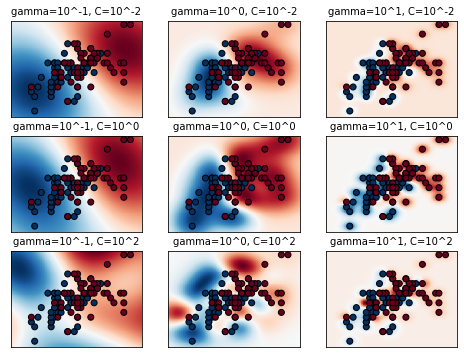

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for k, (C, gamma, clf) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r, edgecolors="k")
    plt.xticks(())
    plt.yticks(())
    plt.axis("tight")

scores = grid.cv_results_["mean_test_score"].reshape(len(C_range), len(gamma_range))

Dessin de la carte thermique de la précision de la validation en fonction de gamma et C

Les partitions sont encodées sous forme de couleurs avec la palette de couleurs chaudes qui varie du rouge foncé au jaune vif. Comme les scores les plus intéressants sont tous situés dans la plage de 0,92 à 0,97, nous utilisons un normalisateur personnalisé pour définir le point médian à 0,92 afin de faciliter la visualisation des petites variations des valeurs de score dans la plage intéressante sans tout effondrer brutalement. les valeurs de score faible à la même couleur.

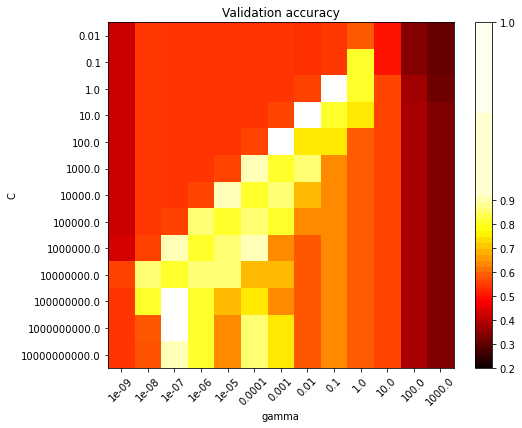

In [8]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=0.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(
    scores,
    interpolation="nearest",
    cmap=plt.cm.hot,
    norm=MidpointNormalize(vmin=0.2, midpoint=0.92),
)
plt.xlabel("gamma")
plt.ylabel("C")
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title("Validation accuracy")
plt.show()

### [**Exemple ⭐** : SVM non linéaire](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py)

Voir ci-dessus, section 1.4.1

## 1.4.6.2. Noyaux personnalisés

Vous pouvez définir vos propres noyaux en donnant le noyau comme une fonction python ou en précalculant la matrice de Gram.

Les classificateurs avec des noyaux personnalisés se comportent de la même manière que tous les autres classificateurs, sauf que :
* Le champ `support_vectors_` est maintenant vide, seuls les indices des vecteurs de support sont stockés dans `support_`
* Une référence (et non une copie) du premier argument de la méthode `fit()` est stockée pour référence future. Si ce tableau change entre l'utilisation de `fit()` et de `predict()`, vous obtiendrez des résultats inattendus.

### Utilisation des fonctions Python comme noyaux

Vous pouvez utiliser vos propres noyaux définis en transmettant une fonction au paramètre `kernel`.

Votre noyau doit prendre comme arguments deux matrices de forme `(n_samples_1, n_features)`, `(n_samples_2, n_features)` et retourner une matrice noyau de forme `(n_samples_1, n_samples_2)`.

Le code suivant définit un noyau linéaire et crée une instance de classificateur qui utilisera ce noyau :

In [ ]:
import numpy as np
from sklearn import svm
def my_kernel(X, Y):
    return np.dot(X, Y.T)
...
clf = svm.SVC(kernel=my_kernel)

#### [**Exemple ⭐** : SVM avec noyau personnalisé](https://scikit-learn.org/stable/auto_examples/svm/plot_custom_kernel.html#sphx-glr-auto-examples-svm-plot-custom-kernel-py)

Utilisation simple des machines à vecteurs de support pour classer un échantillon. Il tracera la surface de décision et les vecteurs de support.

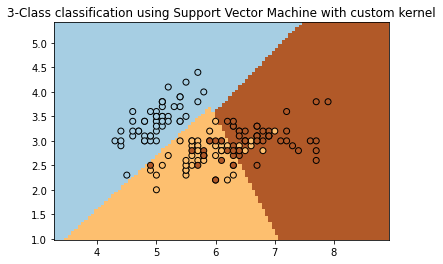

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = 0.02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("3-Class classification using Support Vector Machine with custom kernel")
plt.axis("tight")
plt.show()

#### Utilisation de la matrice de Gram

Vous pouvez passer des noyaux pré-calculés en utilisant l'option `kernel='precomputed'`. Vous devez ensuite passer la matrice de Gram au lieu de X aux méthodes `fit` et `predict`. Les valeurs du noyau entre *tous* les vecteurs d'apprentissage et les vecteurs de test doivent être fournies :

In [10]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
X, y = make_classification(n_samples=10, random_state=0)
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)
clf = svm.SVC(kernel='precomputed')
# linear kernel computation
gram_train = np.dot(X_train, X_train.T)
clf.fit(gram_train, y_train)
SVC(kernel='precomputed')
# predict on training examples
gram_test = np.dot(X_test, X_train.T)
clf.predict(gram_test)
# array([0, 1, 0])

array([0, 1, 0])

# 1.4.7. [Formulation mathématique](https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation)

Une machine à vecteurs de support construit un hyper-plan ou un ensemble d'hyper-plans dans un espace dimensionnel élevé ou infini, qui peut être utilisé pour la classification, la régression ou d'autres tâches. Intuitivement, une bonne séparation est obtenue par l'hyper-plan qui a la plus grande distance aux points de données d'apprentissage les plus proches de n'importe quelle classe (appelée marge fonctionnelle), car en général, plus la marge est grande, plus l'erreur de généralisation du classificateur est faible. La figure ci-dessous montre la fonction de décision pour un problème linéairement séparable, avec trois échantillons sur les limites des marges, appelés « vecteurs de support » :

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_separating_hyperplane_001.png)

En général, lorsque le problème n'est pas linéairement séparable, les vecteurs de support sont les échantillons dans les limites de la marge.

Nous recommandons [13](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf) et [14 - attention c'est payant et cher !](https://link.springer.com/article/10.1023/B:STCO.0000035301.49549.88) comme de bonnes références pour la théorie et les aspects pratiques des SVM.

## 1.4.7.1. SVC

Étant donné les vecteurs d'entraînement $x_i \in \mathbb{R}^p$, $i=1,…, n$, en deux classes, et un vecteur $y \in \{1, -1\}^n$, notre but est de trouver $w \in \mathbb{R}^p$ et $b \in \mathbb{R}$ tel que la prédiction donnée par $\text{sign} (w^T\phi(x) + b)$ est correct pour la plupart des échantillons.

SVC résout le problème primal suivant :

$\begin{align}\begin{aligned}
    \min_ {w, b, \zeta} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i\\
    \begin{split}\textrm {sous la contrainte de } & y_i (w^T \phi (x_i) + b) \geq 1 - \zeta_i,\\
    & \zeta_i \geq 0, i=1, ..., n\end{split}
\end{aligned}\end{align}$

Intuitivement, nous essayons de maximiser la marge (en minimisant $||w||^2 = w^\top w$), tout en encourant une pénalité lorsqu'un échantillon est mal classé ou dans la limite de la marge. Idéalement, la valeur $y_i(w^\top \phi (x_i) + b)$ serait $\ge 1$ pour tous les échantillons, ce qui indique une prédiction parfaite. Mais les problèmes ne sont généralement pas toujours parfaitement séparables avec un hyperplan, nous permettons donc à certains échantillons d'être à distance $\zeta_i$ de leur limite de marge correcte. Le terme de pénalité `C` contrôle la force de cette pénalité et, par conséquent, agit comme un paramètre de régularisation inverse (voir note ci-dessous).

Le problème dual du primal est :

$\begin{align}\begin{aligned}
    \min_{\alpha} \frac{1}{2} \alpha^\top Q \alpha - e^\top \alpha\\\begin{split}
    \textrm {sous la contrainte de } & y^\top \alpha = 0\\
    & 0 \leq \alpha_i \leq C, i=1, ..., n\end{split}
\end{aligned}\end{align}$

où $e$ est le vecteur de tous les uns, et $Q$ est une matrice $n$ par $n$ semi-définie positive, $Q_{ij} \equiv y_i y_j K(x_i, x_j)$, où $K(x_i, x_j) = \phi (x_i)^\top \phi (x_j)$ est le noyau. Les termes $\alpha_i$ sont appelés les coefficients duaux, et ils sont majorés par $C$. Cette représentation duale met en évidence le fait que les vecteurs d'entraînement sont implicitement mappés dans un espace dimensionnel supérieur (peut-être infini) par la fonction $\phi$ : voir [**wkpd** astuce du noyau](https://en.wikipedia.org/wiki/Kernel_method).

Une fois le problème d'optimisation résolu, la sortie de [decision_function](https://scikit-learn.org/stable/glossary.html#term-decision_function) pour un échantillon donné $x$ devient:

$\sum_{i\in SV} y_i \alpha_i K(x_i, x) + b,$

et la classe prédite correspond à son signe. Nous avons seulement besoin de faire la somme sur les vecteurs de support (c'est-à-dire les échantillons qui se trouvent dans la marge) parce que les coefficients duaux $alpha_i$ sont nuls pour les autres échantillons.

Ces paramètres sont accessibles via les attributs `dual_coef_` qui contiennent le produit $y_i \alpha_i$, `support_vectors_` qui contient les vecteurs de support et `intercept_` qui contient le terme indépendant $b$.

**NB** > Alors que les modèles SVM dérivés de [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) et [liblinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/) utilisent `C` comme paramètre de régularisation, la plupart des autres estimateurs utilisent `alpha`. L'équivalence exacte entre le degré de régularisation de deux modèles dépend de la fonction objectif exacte optimisée par le modèle. Par exemple, lorsque l'estimateur utilisé est la régression [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), la relation entre eux est donnée par $C=\frac{1}{\alpha}$.
.




## 1.4.7.2. SVC linéaire

Le problème primal peut être formulé de manière équivalente comme

$\displaystyle\min_ {w, b} \displaystyle\frac{1}{2} w^\top w + C \displaystyle\sum_{i=1}^{n}\max(0, 1 - y_i (w^\top \phi(x_i) + b)),$

où nous utilisons la [perte de charnière](https://en.wikipedia.org/wiki/Hinge_loss). C'est la forme qui est directement optimisée par [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), mais contrairement à la forme duale, celle-ci n'implique pas de produits internes entre les échantillons, donc la fameuse astuce du noyau ne peut pas être appliquée. C'est pourquoi seul le noyau linéaire est supporté par [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) ($\phi$ est la fonction d'identité).

## 1.4.7.3. NuSVC

La formulation $\nu$-SVC [15](https://www.stat.purdue.edu/~yuzhu/stat598m3/Papers/NewSVM.pdf) est une reparamétrisation de la $C$-SVC et donc mathématiquement équivalent.

Nous introduisons un nouveau paramètre $\nu$ (au lieu de $C$) qui contrôle le nombre de vecteurs de support et d'*erreurs de marge* $\nu \in (0, 1]$ : est une borne supérieure sur la fraction d'erreurs de marge et une borne inférieure de la fraction de vecteurs de support. Une erreur de marge correspond à un échantillon qui se trouve du mauvais côté de sa limite de marge : soit il est mal classé, soit il est correctement classé mais ne se situe pas au-delà de la marge.

## 1.4.7.4. SVR

Étant donné les vecteurs d'entraînement $x_i \in \mathbb{R}^p$, $i=1,…, n$, et un vecteur $y \in \mathbb{R}^n$ $\varepsilon$-SVR résout le problème primal suivant :

$\begin{align}\begin{aligned}
    \min_ {w, b, \zeta, \zeta^*} \frac{1}{2} w^\top w +
    C \sum_{i=1}^{n} (\zeta_i + \zeta_i^*)\\
    \begin{split}\textrm {sous la contrainte de } & y_i - w^\top \phi (x_i) - b \leq \varepsilon + \zeta_i,\\
        & w^\top \phi (x_i) + b - y_i \leq \varepsilon + \zeta_i^*,\\
        & \zeta_i, \zeta_i^* \geq 0, i=1, ..., n\end{split}
\end{aligned}\end{align}$

Ici, nous pénalisons les échantillons dont la prédiction est au moins éloignée d'$\varepsilon$ leur véritable cible. Ces prélèvements pénalisent l'objectif par $\zeta_i$ ou $\zeta_i^*$, selon que leurs prédictions se situent au-dessus ou au-dessous du $\varepsilon$ tube.

Le problème dual est

$\begin{align}\begin{aligned}
    \min_{\alpha, \alpha^*} \frac{1}{2} (\alpha - \alpha^*)^\top Q (\alpha - \alpha^*) +
    \varepsilon e^\top (\alpha + \alpha^*) - y^\top (\alpha - \alpha^*)\\
    \begin{split}
        \textrm {sous la contrainte de } & e^\top (\alpha - \alpha^*) = 0\\
        & 0 \leq \alpha_i, \alpha_i^* \leq C, i=1, ..., n
    \end{split}
\end{aligned}\end{align}$


où $e$ est le vecteur de tous les uns, $Q$ est une matrice semi-définie par positive, $Q_{ij} \equiv K(x_i, x_j) = \phi (x_i)^\top \phi (x_j)$ est le noyau. Ici, les vecteurs d'entraînement sont implicitement mappés dans un espace dimensionnel supérieur (peut-être infini) par la fonction $\phi$.

La prédiction est :

$\sum_{i \in SV}(\alpha_i - \alpha_i^*) K(x_i, x) + b$

Ces paramètres sont accessibles via les attributs `dual_coef_` qui contient la différence $\alpha_i - \alpha_i^*$, `support_vectors_` qui contient les vecteurs de support et `intercept_` qui contient le terme indépendant $b$.

## 1.4.7.5. LinearSVR

Le problème primal peut être formulé de manière équivalente comme

$\displaystyle\min_ {w, b} \displaystyle\frac{1}{2} w^\top w + C \displaystyle\sum_{i=1}\max(0, |y_i - (w^\top \phi(x_i) + b)| - \varepsilon),$

où nous utilisons la perte insensible à epsilon, c'est-à-dire que les erreurs inférieures à $\varepsilon$ sont ignorées. C'est la forme qui est directement optimisée par [LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR).

# 1.4.8. [Détails d'implémentation](https://scikit-learn.org/stable/modules/svm.html#implementation-details)

En interne, nous utilisons [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) [12] et [liblinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/) [11] pour gérer tous les calculs. Ces bibliothèques sont encapsulées à l'aide de C et de Cython. Pour une description de l'implémentation et des détails sur les algorithmes utilisés, veuillez vous référer à leurs articles respectifs.

**Références**:

[9] Platt [“Probabilistic outputs for SVMs and comparisons to regularized likelihood methods”](https://home.cs.colorado.edu/~mozer/Teaching/syllabi/6622/papers/Platt1999.pdf).

[10] Wu, Lin and Weng, [“Probability estimates for multi-class classification by pairwise coupling”](https://www.csie.ntu.edu.tw/~cjlin/papers/svmprob/svmprob.pdf), JMLR 5:975-1005, 2004.

[11] (1,2) Fan, Rong-En, et al., [“LIBLINEAR: A library for large linear classification.”](https://www.csie.ntu.edu.tw/~cjlin/papers/liblinear.pdf), Journal of machine learning research 9.Aug (2008): 1871-1874.

[12] (1,2) Chang and Lin, [LIBSVM: A Library for Support Vector Machines](https://www.csie.ntu.edu.tw/~cjlin/papers/libsvm.pdf).

[13] Bishop, [Pattern recognition and machine learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf), chapter 7 Sparse Kernel Machines

[14] [**PAYANT** “A Tutorial on Support Vector Regression”](https://link.springer.com/article/10.1023/B:STCO.0000035301.49549.88) Alex J. Smola, Bernhard Schölkopf - Statistics and Computing archive Volume 14 Issue 3, August 2004, p. 199-222.

[15] Schölkopf et. al [New Support Vector Algorithms](https://www.stat.purdue.edu/~yuzhu/stat598m3/Papers/NewSVM.pdf)

[16] Crammer and Singer [On the Algorithmic Implementation ofMulticlass Kernel-based Vector Machines](https://jmlr.csail.mit.edu/papers/volume2/crammer01a/crammer01a.pdf), JMLR 2001.


# 1.6. Plus proches voisins

[`sklearn.neighbors`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) fournit des fonctionnalités pour les méthodes d'apprentissage non supervisées et supervisées basées sur les voisins. Les plus proches voisins non supervisés sont à la base de nombreuses autres méthodes d'apprentissage, notamment l'apprentissage multiple et le regroupement spectral. L'apprentissage supervisé basé sur les voisins se présente sous deux formes : la [classification](https://scikit-learn.org/stable/modules/neighbors.html#classification) pour les données avec des étiquettes discrètes et la [régression](https://scikit-learn.org/stable/modules/neighbors.html#regression) pour les données avec des étiquettes continues.

Le principe derrière les méthodes du plus proche voisin est de trouver un nombre prédéfini d'échantillons d'apprentissage les plus proches en distance du nouveau point, et de prédire l'étiquette à partir de ceux-ci. Le nombre d'échantillons peut être une constante définie par l'utilisateur (apprentissage du k plus proche voisin) ou varier en fonction de la densité locale de points (apprentissage du voisin basé sur le rayon). La distance peut, en général, être n'importe quelle mesure métrique : la distance euclidienne standard est le choix le plus courant. Les méthodes basées sur les voisins sont connues sous le nom de méthodes d'apprentissage automatique non généralisantes, car elles "se souviennent" simplement de toutes ses données d'entraînement (éventuellement transformées en une structure d'indexation rapide telle qu'un [`Ball Tree`](https://scikit-learn.org/stable/modules/neighbors.html#ball-tree) ou un [`KD Tree`](https://scikit-learn.org/stable/modules/neighbors.html#kd-tree)).

Malgré sa simplicité, les plus proches voisins ont réussi dans un grand nombre de problèmes de classification et de régression, y compris les chiffres manuscrits et les scènes d'images satellites. Étant une méthode non paramétrique, elle réussit souvent dans des situations de classification où la frontière de décision est très irrégulière.

Les classes de [`sklearn.neighbors`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) peuvent gérer des tableaux NumPy ou des matrices `scipy.sparse` en entrée. Pour les matrices denses, un grand nombre de mesures de distance possibles sont prises en charge. Pour les matrices creuses, les métriques de Minkowski arbitraires sont prises en charge pour les recherches.

Il existe de nombreuses routines d'apprentissage qui reposent sur les voisins les plus proches. Un exemple est l'[estimation de la densité du noyau](https://scikit-learn.org/stable/modules/density.html#kernel-density), discutée dans la section sur l'[estimation de la densité](https://scikit-learn.org/stable/modules/density.html#density-estimation).

## (...)

## 1.6.2. Classification par les plus proches voisins

La classification basée sur les voisins est un type d'*apprentissage basé sur les instances* ou d'*apprentissage non généralisant* : il ne tente pas de construire un modèle interne général, mais stocke simplement des instances des données d'apprentissage. La classification est calculée à partir d'un vote à la majorité simple des plus proches voisins de chaque point : un point de requête se voit attribuer la classe de données qui a le plus de représentants parmi les plus proches voisins du point.

scikit-learn implémente deux classificateurs de voisins les plus proches différents : [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) implémente l'apprentissage basé sur les $k$ voisins les plus proches de chaque point de requête, où $k$ est une valeur entière spécifiée par l'utilisateur. [`RadiusNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier) implémente l'apprentissage basé sur le nombre de voisins dans un rayon fixe $r$ de chaque point d'entraînement, où $r$ est une valeur à virgule flottante spécifiée par l'utilisateur.

La classification des $k$-voisins dans [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) est la technique la plus couramment utilisée. Le choix optimal de la valeur $k$ dépend fortement des données : en général, un plus grand $k$ supprime les effets du bruit, mais rend les limites de classification moins distinctes.

Dans les cas où les données ne sont pas échantillonnées de manière uniforme, la classification des voisins basée sur le rayon dans [`RadiusNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html#sklearn.neighbors.RadiusNeighborsClassifier) peut être un meilleur choix. L'utilisateur spécifie un rayon fixe $r$, de sorte que les points situés dans des voisinages moins denses utilisent moins de voisins les plus proches pour la classification. Pour les espaces de paramètres de grande dimension, cette méthode devient moins efficace en raison de la fameuse « malédiction de la dimensionnalité ».

La classification de base des voisins les plus proches utilise des pondérations uniformes : c'est-à-dire que la valeur attribuée à un point de requête est calculée à partir d'un vote à la majorité simple des voisins les plus proches. Dans certaines circonstances, il est préférable de pondérer les voisins de sorte que les voisins les plus proches contribuent davantage à l'ajustement. Cela peut être accompli grâce au mot-clé weights. La valeur par défaut, weights = 'uniform', attribue des poids uniformes à chaque voisin. weights = 'distance' attribue des poids proportionnels à l'inverse de la distance depuis le point de requête. Alternativement, une fonction définie par l'utilisateur de la distance peut être fournie pour calculer les poids.


## [**Exemple** de classification par les plus proches voisins](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

Exemple d'utilisation de la classification par les plus proches voisin. Il tracera les limites de décision pour chaque classe.

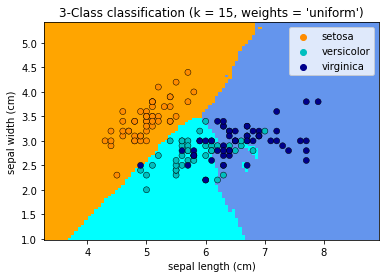

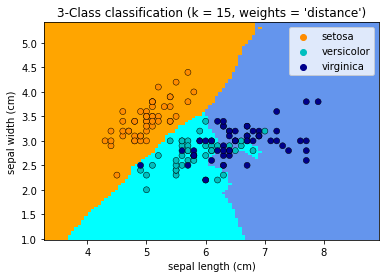

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
#%pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method='predict',
        plot_method='pcolormesh',
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading='auto',
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor='black',
    )
    plt.title(
        f'3-Class classification (k = {n_neighbors}, weights = \'{weights}\')'
    )

plt.show()

In [9]:
# %pip freeze | findstr scikit
# %pip install --upgrade scikit-learn
from importlib.metadata import version
version('scikit-learn') #-> 1.0.2, or DecisionBoundaryDisplay est >= 1.1


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


'1.1.2'

# 1.10. Arbres de décision

Les **arbres de décision** (*Decision Trees* - DTs) sont une méthode d'apprentissage supervisé non paramétrique utilisée pour la classification et la régression. L'objectif est de créer un modèle qui prédit la valeur d'une variable cible en apprenant des règles de décision simples déduites des caractéristiques des données. Un arbre peut être vu comme une approximation constante par morceaux.

Par exemple, dans l'exemple ci-dessous, les arbres de décision apprennent à partir des données pour approximer une courbe sinusoïdale avec un ensemble de règles de décision if-then-else. Plus l'arbre est profond, plus les règles de décision sont complexes et plus le modèle est adapté.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_tree_regression_001.png)

Certains avantages des arbres de décision sont :

* Simple à comprendre et à interpréter. Les arbres peuvent être visualisés.

* Nécessite peu de préparation des données. D'autres techniques nécessitent souvent une normalisation des données, des variables fictives doivent être créées et des valeurs vides doivent être supprimées. Notez cependant que ce module ne prend pas en charge les valeurs manquantes.

* Le coût d'utilisation de l'arbre (c'est-à-dire la prédiction des données) est logarithmique en le nombre de points de données utilisés pour former l'arbre.

* Capable de traiter des données numériques et catégorielles. Cependant, l'implémentation de scikit-learn ne prend pas en charge les variables catégorielles pour le moment. D'autres techniques sont généralement spécialisées dans l'analyse d'ensembles de données qui n'ont qu'un seul type de variable. Voir les algorithmes pour plus d'informations.

* Capable de gérer les problèmes multi-sorties.

* Utilise un modèle de boîte blanche. Si une situation donnée est observable dans un modèle, l'explication de la condition est facilement expliquée par la logique booléenne. En revanche, dans un modèle de boîte noire (par exemple, dans un réseau de neurones artificiels), les résultats peuvent être plus difficiles à interpréter.

* Possibilité de valider un modèle à l'aide de tests statistiques. Cela permet de rendre compte de la fiabilité du modèle.

* Fonctionne bien même si ses hypothèses sont quelque peu violées par le vrai modèle à partir duquel les données ont été générées.

Les inconvénients des arbres de décision incluent :

* Les apprenants en arbre de décision peuvent créer des arbres trop complexes qui ne généralisent pas bien les données. C'est ce qu'on appelle le surajustement. Des mécanismes tels que l'élagage, la définition du nombre minimum d'échantillons requis à un nœud feuille ou la définition de la profondeur maximale de l'arbre sont nécessaires pour éviter ce problème.

* Les arbres de décision peuvent être instables car de petites variations dans les données peuvent entraîner la génération d'un arbre complètement différent. Ce problème est atténué par l'utilisation d'arbres de décision au sein d'un ensemble.

* Les prédictions des arbres de décision ne sont ni lisses ni continues, mais des approximations constantes par morceaux, comme le montre la figure ci-dessus. Par conséquent, ils ne sont pas bons pour l'extrapolation.

* Le problème d'apprentissage d'un arbre de décision optimal est connu pour être NP-complet sous plusieurs aspects de l'optimalité et même pour des concepts simples. Par conséquent, les algorithmes pratiques d'apprentissage d'arbre de décision sont basés sur des algorithmes heuristiques tels que l'algorithme glouton où des décisions localement optimales sont prises à chaque nœud. De tels algorithmes ne peuvent pas garantir de retourner l'arbre de décision globalement optimal. Cela peut être atténué en formant plusieurs arbres dans un apprenant d'ensemble, où les caractéristiques et les échantillons sont échantillonnés de manière aléatoire avec remplacement.

* Il existe des concepts difficiles à apprendre car les arbres de décision ne les expriment pas facilement, comme les problèmes de OU exclusif, de parité ou de multiplexeur.

* Les apprenants de l'arbre de décision créent des arbres biaisés si certaines classes dominent. Il est donc recommandé d'équilibrer l'ensemble de données avant de l'adapter à l'arbre de décision.


## 1.10.1. Classification

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) est une classe capable d'effectuer une classification multi-classes sur un ensemble de données.

Comme avec les autres classifieurs, [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) prend en entrée deux tableaux : un tableau X, clairsemé ou dense, de forme `(n_samples, n_features)` contenant les échantillons d'apprentissage, et un tableau Y de valeurs entières, forme `(n_samples,)`, contenant les étiquettes de classe pour les échantillons d'apprentissage :



In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Après avoir été ajusté, le modèle peut être utilisé pour prédire la classe d'échantillons :

In [2]:
clf.predict([[2., 2.]])

array([1])

Dans le cas où il existe plusieurs classes avec la même probabilité et la plus élevée (<mark>NDLR > pas clair</mark>), le classifieur prédira la classe avec l'indice le plus bas parmi ces classes.

Comme alternative à la sortie d'une classe spécifique, la probabilité de chaque classe peut être prédite, laquelle est la fraction d'échantillons d'entraînement de la classe dans une feuille :

In [3]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) est capable à la fois d'une classification binaire (où les étiquettes sont $[-1, 1]$) et d'une classification multiclasse (où les étiquettes sont $[0, …, K-1]$).

En utilisant le jeu de données Iris, nous pouvons construire un arbre comme suit :

In [4]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

Une fois entraîné, vous pouvez tracer l'arbre avec la fonction `plot_tree` :

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

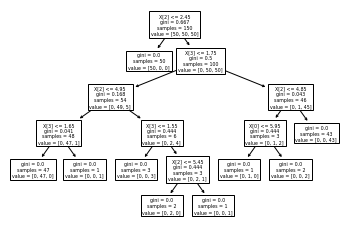

In [5]:
tree.plot_tree(clf)

# TODO : voir pouruuoi il y a divergence avec l'exemple donné par ScikitLearn

Nous pouvons également exporter l'arbre au format [Graphviz](https://www.graphviz.org) en utilisant l'exporteur [`export_graphviz`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz). Si vous utilisez le gestionnaire de packages [conda](https://conda.io), les fichiers binaires graphviz et le package python peuvent être installés avec `conda install python-graphviz`.

Alternativement, les binaires pour graphviz peuvent être téléchargés à partir de la page d'accueil du projet graphviz, et le wrapper Python installé à partir de pypi avec `pip install graphviz`.

Vous trouverez ci-dessous un exemple d'exportation graphviz de l'arbre ci-dessus formé sur l'ensemble de données d'iris ; les résultats sont enregistrés dans un fichier de sortie `iris.pdf` :

In [6]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

L'exporteur [`export_graphviz`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz) prend également en charge une variété d'options esthétiques, y compris la coloration des nœuds par leur classe (ou leur valeur de régression) et l'utilisation de noms de variables et de classes explicites si vous le souhaitez. Les notebooks Jupyter affichent également automatiquement ces graphiques en ligne :

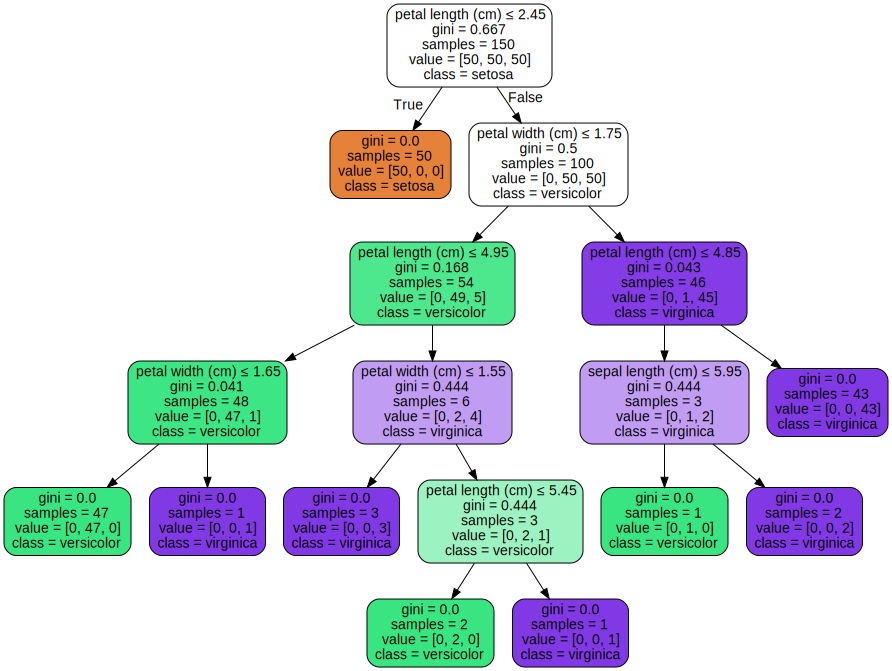

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,  
    filled=True, rounded=True,  
    special_characters=True)  
graph = graphviz.Source(dot_data)  
display(graph)

Alternativement, l'arbre peut également être exporté au format texte avec la fonction [`export_text`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html#sklearn.tree.export_text). Cette méthode ne nécessite pas l'installation de librairies externes et est plus compacte :

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



### [**Exemple ⭐⭐⭐** : Tracer la surface de décision des arbres de décision formés sur l'ensemble de données iris](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

Trace la surface de décision d'un arbre de décision formé sur des paires de caractéristiques de l'ensemble de données d'iris.

Pour chaque paire de caractéristiques d'iris, l'arbre de décision apprend les limites de décision constituées de combinaisons de règles de seuillage simples déduites des échantillons d'apprentissage.

Nous montrons également l'arborescence d'un modèle construit sur l'ensemble des caractéristiques.

Chargeons d'abord la copie de l'ensemble de données Iris fourni avec scikit-learn :

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

Affichez les fonctions de décision des arbres entraînés sur toutes les paires d'entités.

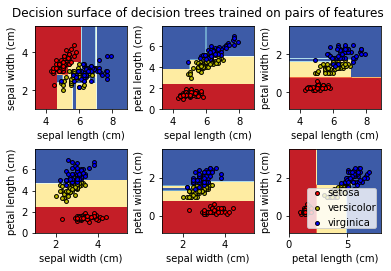

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay


# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

Affichez la structure d'un arbre de décision unique formé sur toutes les fonctionnalités ensemble.

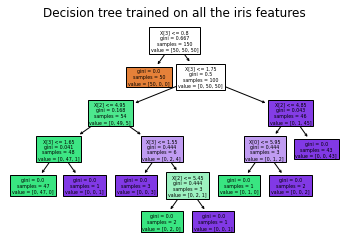

In [11]:
from sklearn.tree import plot_tree

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

### [**Exemple ⭐⭐⭐⭐** : Comprendre la structure de l'arbre de décision](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

La structure de l'arbre de décision peut être analysée pour mieux comprendre la relation entre les caractéristiques et la cible à prédire. Dans cet exemple, nous montrons comment récupérer :
* la structure arborescente binaire ;
* la profondeur de chaque nœud et s'il s'agit ou non d'une feuille ;
* les nœuds qui ont été atteints par un échantillon à l'aide de la méthode decision_path ;
* la feuille qui a été atteinte par un échantillon en utilisant la méthode d'application ;
* les règles qui ont été utilisées pour prédire un échantillon ;
* le chemin de décision partagé par un groupe d'échantillons.

In [13]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#### Entraîner le classificateur d'arbres

Tout d'abord, nous adaptons un [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) à l'aide du jeu de données [`load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris).

In [14]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

#### Arborescence

Le classifieur de décision a un attribut appelé `tree_` qui permet d'accéder à des attributs de bas niveau tels que `node_count`, le nombre total de nœuds, et `max_depth`, la profondeur maximale de l'arbre. Il stocke également toute la structure de l'arborescence binaire, représentée par un certain nombre de tableaux parallèles. Le i-ème élément de chaque tableau contient des informations sur le nœud `i`. Le nœud 0 est la racine de l'arborescence. Certains des tableaux ne s'appliquent qu'aux feuilles ou aux nœuds divisés. Dans ce cas les valeurs des nœuds de l'autre type sont arbitraires. Par exemple, les tableaux `feature` et `threshold` ne s'appliquent qu'aux nœuds fractionnés. Les valeurs des nœuds feuilles dans ces tableaux sont donc arbitraires.

Parmi ces tableaux, nous avons :
* `children_left[i]` : id de l'enfant gauche du nœud `i` ou -1 si nœud feuille
* `children_right[i]` : id du fils droit du nœud `i` ou -1 si nœud feuille
* `feature[i]` : fonctionnalité utilisée pour diviser le nœud `i`
* `threshold[i]` : valeur de seuil au nœud `i`
* `n_node_samples[i]` : le nombre d'échantillons d'apprentissage atteignant le nœud `i`
* `impurity[i]` : l'impureté au nœud `i`

En utilisant les tableaux, nous pouvons parcourir la structure arborescente pour calculer diverses propriétés. Ci-dessous, nous calculerons la profondeur de chaque nœud et s'il s'agit ou non d'une feuille.

In [15]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 is a leaf node.
		node=4 is a leaf node.


Nous pouvons comparer la sortie ci-dessus au tracé de l'arbre de décision.

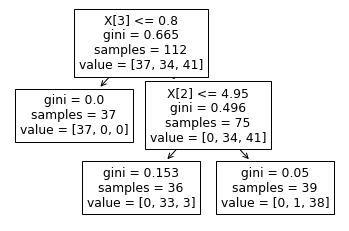

In [16]:
tree.plot_tree(clf)
plt.show()

#### Chemin de décision

Nous pouvons également récupérer le chemin de décision des échantillons d'intérêt. La méthode `decision_path` génère une matrice d'indicateurs qui nous permet de récupérer les nœuds traversés par les échantillons d'intérêt. Un élément non nul dans la matrice indicatrice à la position `(i, j)` indique que l'échantillon `i` passe par le nœud `j`. Ou, pour un échantillon `i`, les positions des éléments non nuls dans la ligne `i` de la matrice d'indicateurs désignent les identifiants des nœuds traversés par l'échantillon.

Les identifiants de feuille atteints par les échantillons d'intérêt peuvent être obtenus avec la méthode `apply`. Cela renvoie un tableau des identifiants de nœud des feuilles atteintes par chaque échantillon d'intérêt. En utilisant les identifiants de feuille et `decision_path`, nous pouvons obtenir les conditions de fractionnement qui ont été utilisées pour prédire un échantillon ou un groupe d'échantillons. Tout d'abord, faisons-le pour un échantillon. Notez que `node_index` est une matrice creuse.

In [17]:
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

sample_id = 0
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:

decision node 0 : (X_test[0, 3] = 2.4) > 0.800000011920929)
decision node 2 : (X_test[0, 2] = 5.1) > 4.950000047683716)


Pour un groupe d'échantillons, on peut déterminer les nœuds communs traversés par les échantillons.

In [18]:
sample_ids = [0, 1]
# boolean array indicating the nodes both samples go through
common_nodes = node_indicator.toarray()[sample_ids].sum(axis=0) == len(sample_ids)
# obtain node ids using position in array
common_node_id = np.arange(n_nodes)[common_nodes]

print(
    "\nThe following samples {samples} share the node(s) {nodes} in the tree.".format(
        samples=sample_ids, nodes=common_node_id
    )
)
print("This is {prop}% of all nodes.".format(prop=100 * len(common_node_id) / n_nodes))


The following samples [0, 1] share the node(s) [0 2] in the tree.
This is 40.0% of all nodes.
